In [236]:
options(digits = 9)
options(repr.plot.width=18, repr.plot.height=10)

In [237]:
df <- read.csv('ts.csv')
df$Date <- as.Date(df$Date)
tail(df)

,Date,SLV,SLVP
,<date>,<dbl>,<dbl>
2824,2023-05-23,21.51,10.41
2825,2023-05-24,21.16,10.16
2826,2023-05-25,20.86,10.01
2827,2023-05-26,21.38,10.02
2828,2023-05-30,21.30,10.09
2829,2023-05-31,21.61,10.15


In [238]:
library(xts)

xts_SLV <- xts(df$SLV, order.by = df$Date)
xts_SLVP <- xts(df$SLVP, order.by = df$Date)

ts_SLV <- as.ts(xts_SLV)
ts_SLVP <- as.ts(xts_SLVP)

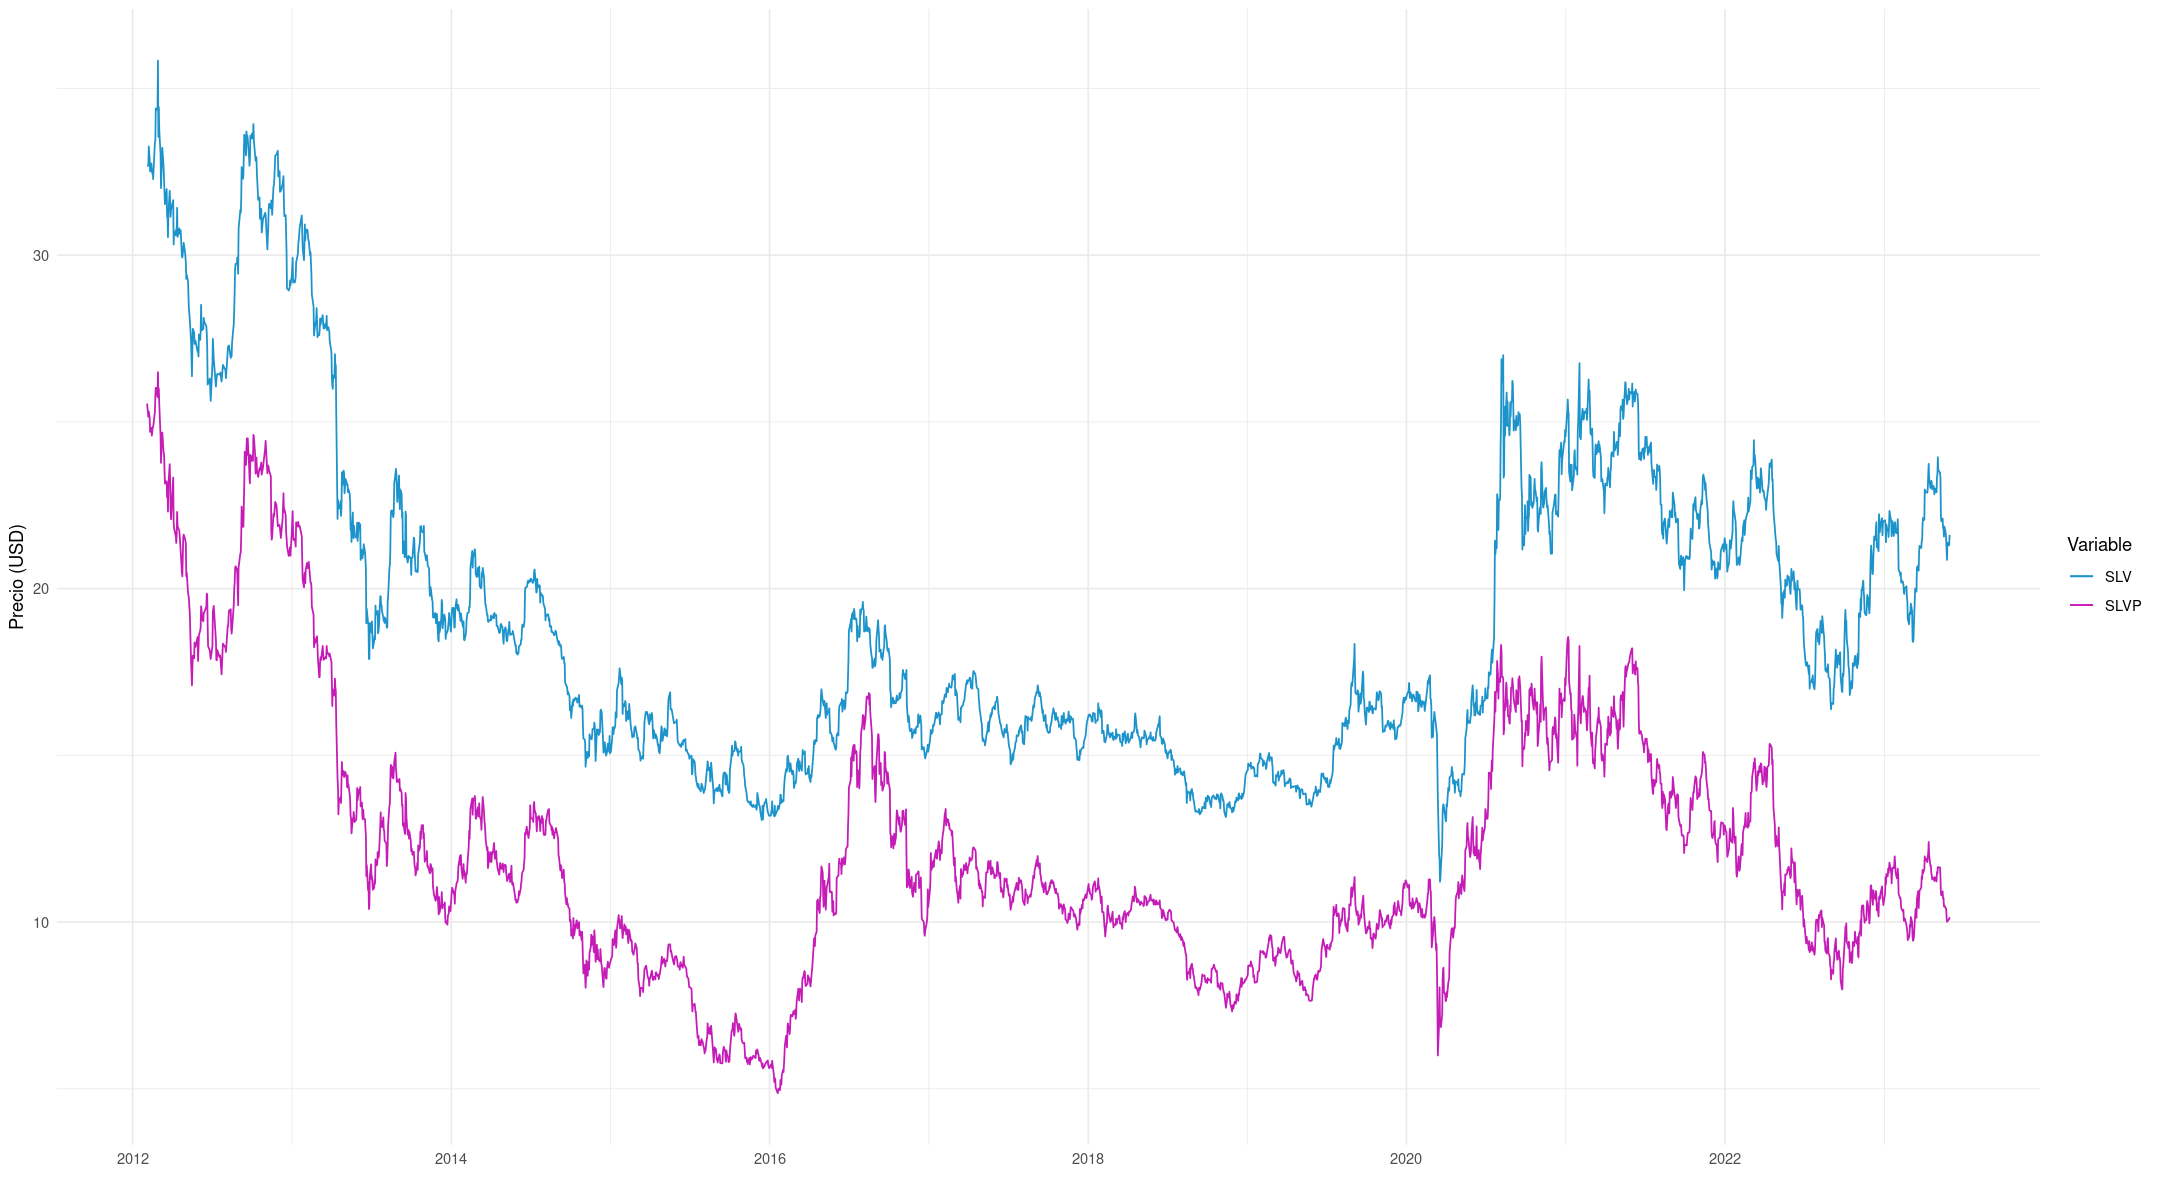

In [239]:
library(ggplot2)

graph_ts <- ggplot(df, aes(x = Date)) +
  geom_line(aes(y = SLV, color = "SLV")) +
  geom_line(aes(y = SLVP, color = "SLVP")) +
  labs(x='', y = "Precio (USD)", color = "Variable") +
  scale_color_manual(values = c("SLV" = "#1c93ca", "SLVP" = "#c51cb7")) +
  theme_minimal()

ggsave("../Imagenes/ts.png", plot = graph_ts, width = 6, height = 3.3)

graph_ts

In [240]:
library(urca)

run_unit_root_tests <- function(variables, variable_names, test_types, lags) {
  for (i in seq_along(variables)) {
    for (type in test_types) {
      result <- summary(ur.df(variables[[i]], lags = lags, type = type))

      cat("Value of test-statistic for", variable_names[i], "\nwith", type, "is:", result@teststat, "\n")

      cat("Critical values for test statistics:\n")
      print(result@cval)
      cat("\n")
    }
  }
}

In [241]:
variables <- list(ts_SLV, ts_SLVP)
variable_names <- c("iShares Silver Trust (SLV)", "iShares MSCI Global Silver and Metals Miners ETF (SLVP)")
test_types <- c("trend", "drift", "none")
lags <- 6

run_unit_root_tests(variables, variable_names, test_types, lags)

Value of test-statistic for iShares Silver Trust (SLV) 
with trend is: -2.78339073 3.53071527 5.10559237 
Critical values for test statistics:
      1pct  5pct 10pct
tau3 -3.96 -3.41 -3.12
phi2  6.09  4.68  4.03
phi3  8.27  6.25  5.34

Value of test-statistic for iShares Silver Trust (SLV) 
with drift is: -2.98465674 4.64454802 
Critical values for test statistics:
      1pct  5pct 10pct
tau2 -3.43 -2.86 -2.57
phi1  6.43  4.59  3.78

Value of test-statistic for iShares Silver Trust (SLV) 
with none is: -1.31364459 
Critical values for test statistics:
      1pct  5pct 10pct
tau1 -2.58 -1.95 -1.62

Value of test-statistic for iShares MSCI Global Silver and Metals Miners ETF (SLVP) 
with trend is: -3.18671589 4.15272285 5.79474674 
Critical values for test statistics:
      1pct  5pct 10pct
tau3 -3.96 -3.41 -3.12
phi2  6.09  4.68  4.03
phi3  8.27  6.25  5.34

Value of test-statistic for iShares MSCI Global Silver and Metals Miners ETF (SLVP) 
with drift is: -3.36894266 6.10934176 
Critic

In [242]:
d.ts_SLV= diff(ts_SLV)
l.ts_SLV=log(ts_SLV)
dl.ts_SLV= diff(log(ts_SLV))


d.ts_SLVP= diff(ts_SLVP)
l.ts_SLVP=log(ts_SLVP)
dl.ts_SLVP= diff(log(ts_SLVP))

In [243]:
# Crear las listas de variables y nombres
variables <- list(d.ts_SLV, l.ts_SLV, dl.ts_SLV, d.ts_SLVP, l.ts_SLVP, dl.ts_SLVP)
variable_names <- c(
  "Diff iShares Silver Trust (SLV)",
  "Log iShares Silver Trust (SLV)",
  "Diff Log iShares Silver Trust (SLV)",
  "Diff iShares MSCI Global Silver and Metals Miners ETF (SLVP)",
  "Log iShares MSCI Global Silver and Metals Miners ETF (SLVP)",
  "Diff Log iShares MSCI Global Silver and Metals Miners ETF (SLVP)"
)

test_types <- c("trend", "drift", "none")
lags <- 6

# Ejecutar la función con las nuevas series de tiempo
run_unit_root_tests(variables, variable_names, test_types, lags)

Value of test-statistic for Diff iShares Silver Trust (SLV) 
with trend is: -20.3227754 137.671997 206.507602 
Critical values for test statistics:
      1pct  5pct 10pct
tau3 -3.96 -3.41 -3.12
phi2  6.09  4.68  4.03
phi3  8.27  6.25  5.34

Value of test-statistic for Diff iShares Silver Trust (SLV) 
with drift is: -20.2579629 205.192923 
Critical values for test statistics:
      1pct  5pct 10pct
tau2 -3.43 -2.86 -2.57
phi1  6.43  4.59  3.78

Value of test-statistic for Diff iShares Silver Trust (SLV) 
with none is: -20.251132 
Critical values for test statistics:
      1pct  5pct 10pct
tau1 -2.58 -1.95 -1.62

Value of test-statistic for Log iShares Silver Trust (SLV) 
with trend is: -2.56971127 2.92300877 4.27841558 
Critical values for test statistics:
      1pct  5pct 10pct
tau3 -3.96 -3.41 -3.12
phi2  6.09  4.68  4.03
phi3  8.27  6.25  5.34

Value of test-statistic for Log iShares Silver Trust (SLV) 
with drift is: -2.69869792 3.74757251 
Critical values for test statistics:
     

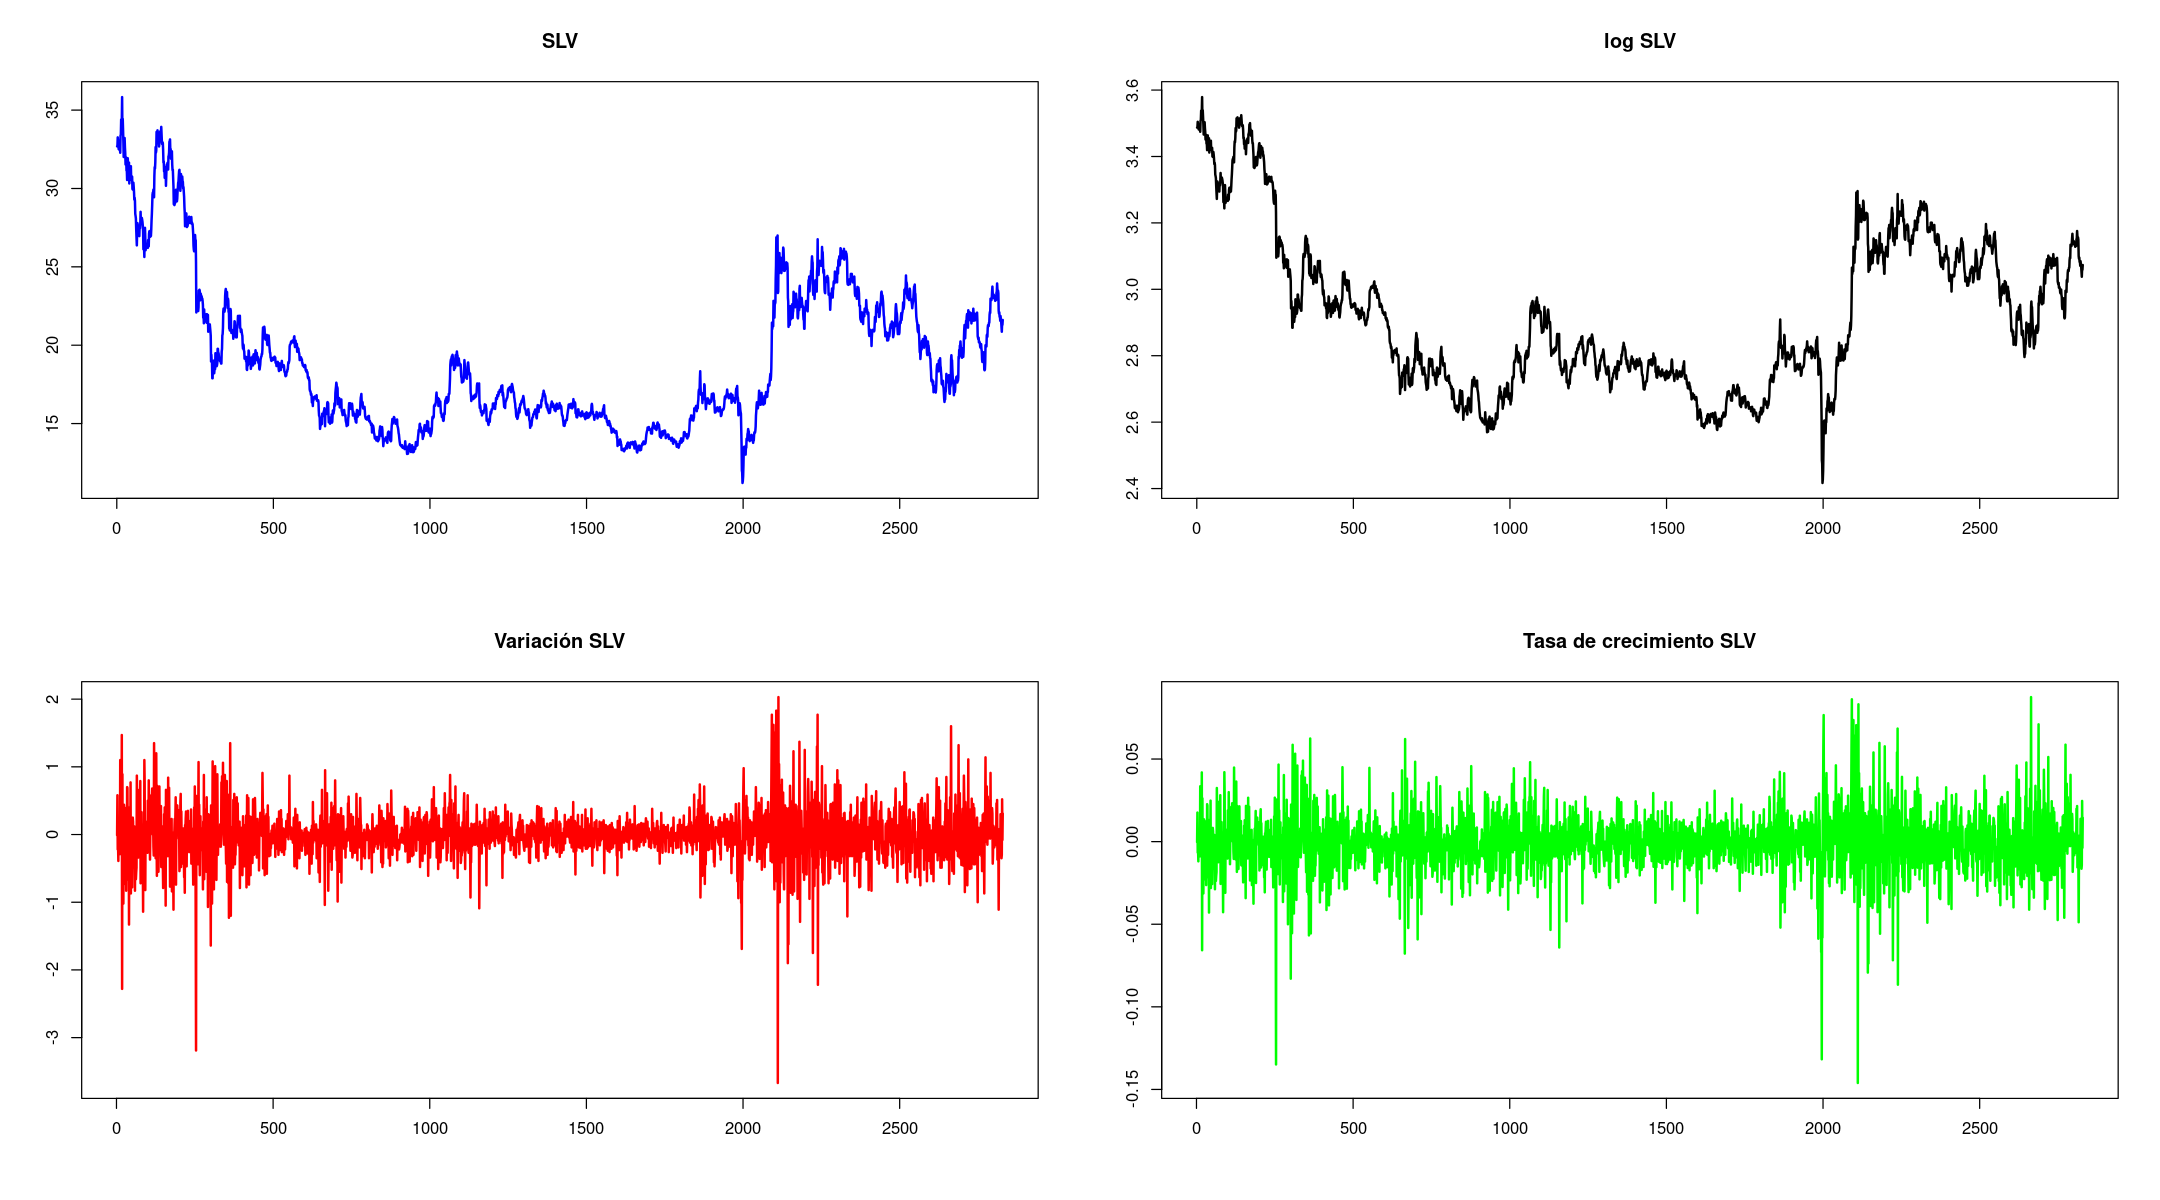

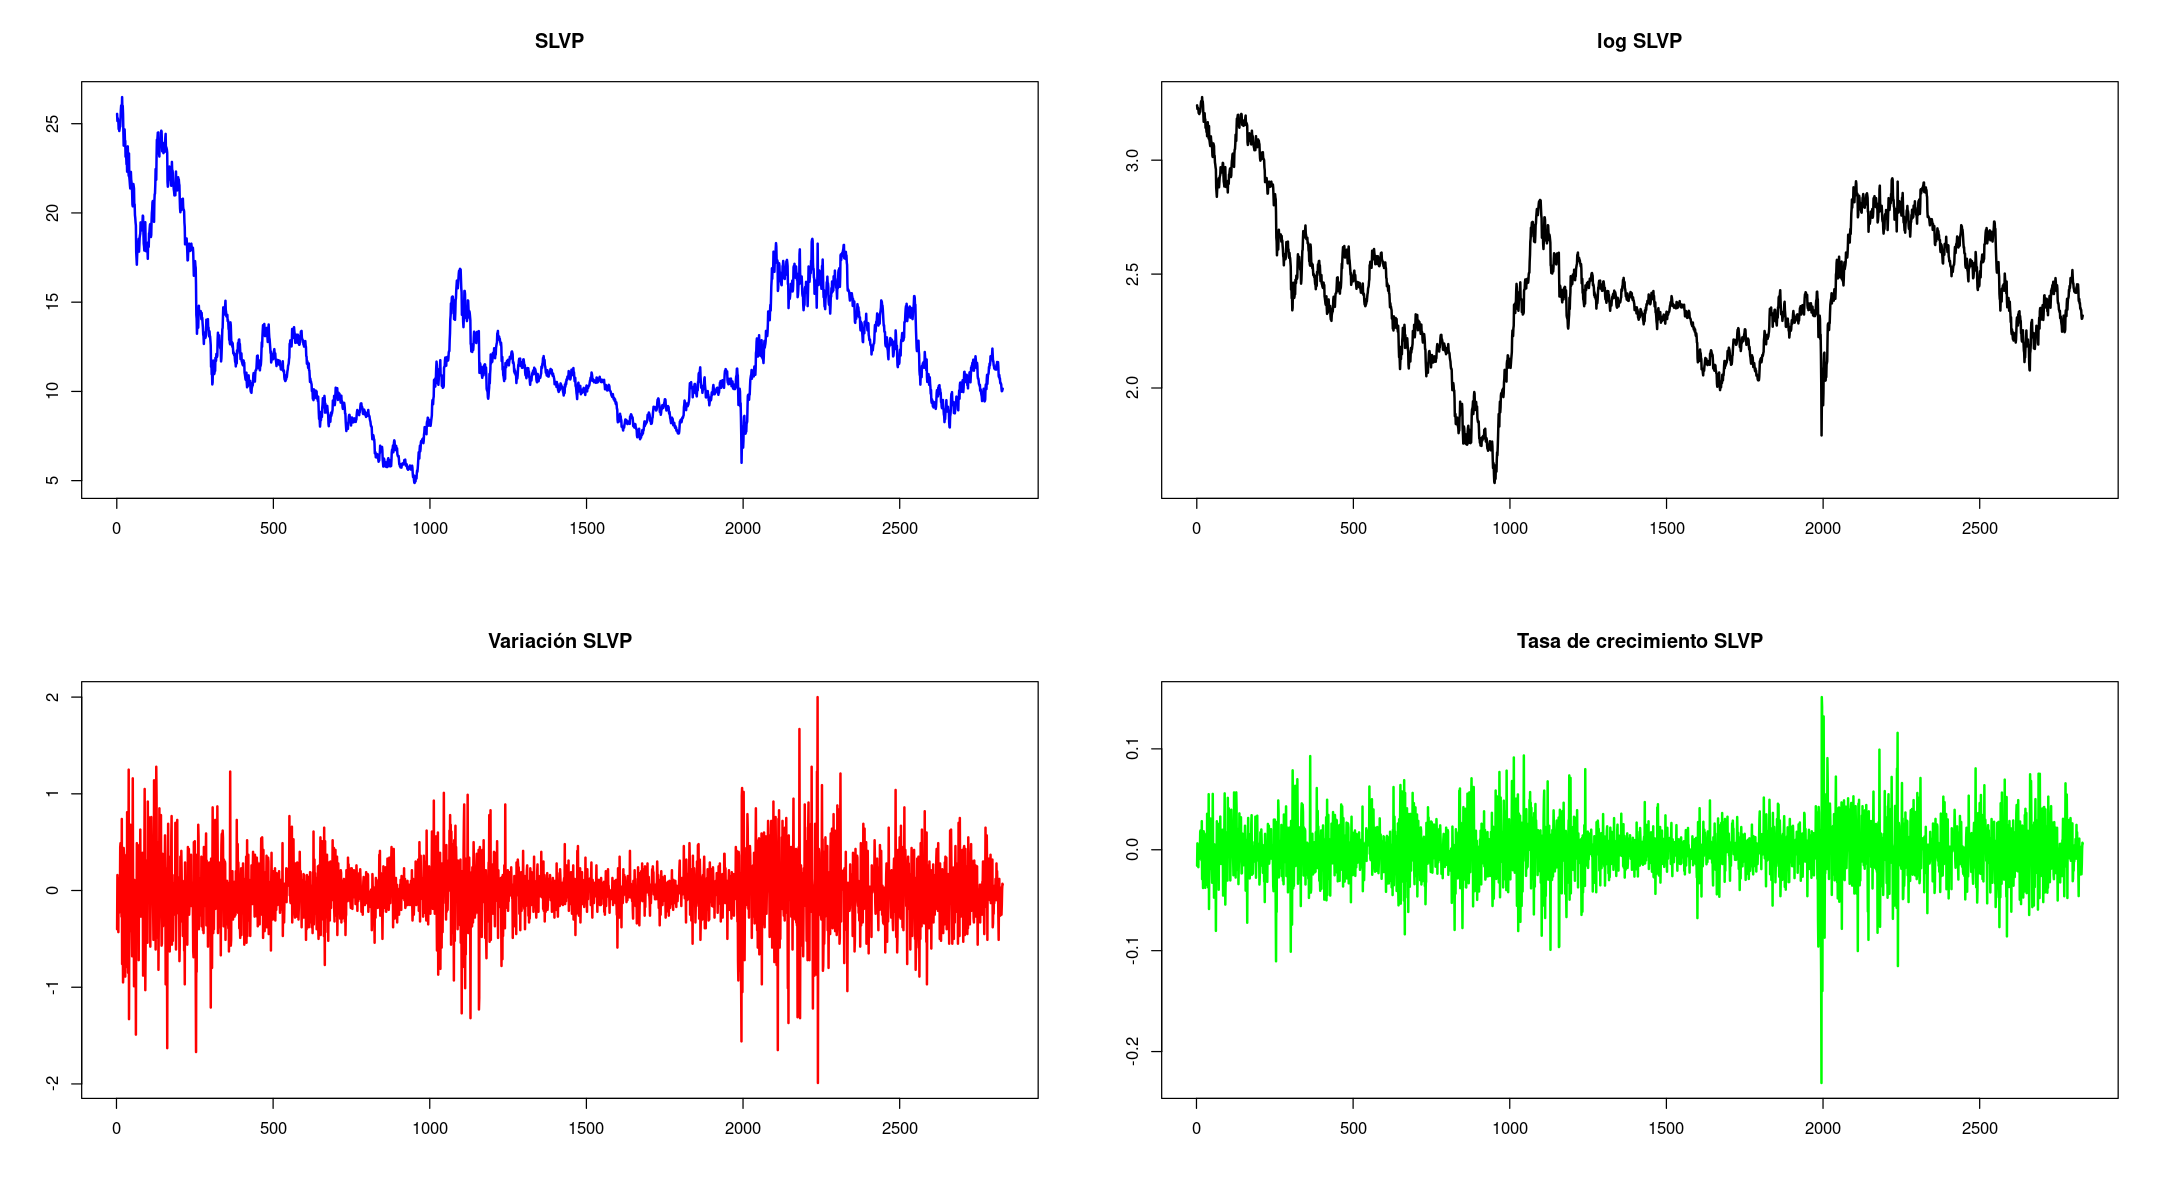

In [244]:
par(mfrow=c(2,2))

# Gráficas de series de tiempo para SLV
plot.ts(ts_SLV, xlab="", ylab="", main="SLV", lty=1, lwd=2, col="blue")
plot.ts(l.ts_SLV, xlab="", ylab="", main="log SLV", lty=1, lwd=2, col="black")
plot.ts(d.ts_SLV, xlab="", ylab="", main="Variación SLV", lty=1, lwd=2, col="red")
plot.ts(dl.ts_SLV, xlab="", ylab="", main="Tasa de crecimiento SLV", lty=1, lwd=2, col="green")

# Gráficas de series de tiempo para SLVP
plot.ts(ts_SLVP, xlab="", ylab="", main="SLVP", lty=1, lwd=2, col="blue")
plot.ts(l.ts_SLVP, xlab="", ylab="", main="log SLVP", lty=1, lwd=2, col="black")
plot.ts(d.ts_SLVP, xlab="", ylab="", main="Variación SLVP", lty=1, lwd=2, col="red")
plot.ts(dl.ts_SLVP, xlab="", ylab="", main="Tasa de crecimiento SLVP", lty=1, lwd=2, col="green")


In [245]:
library(dynlm)
library(broom)

FS_EGADF <- dynlm(ts_SLVP ~ ts_SLV) 
summary(FS_EGADF)

tidy_FS_EGADF = tidy(FS_EGADF)
tidy_FS_EGADF
# Parámetro/vector de cointegración calculado por MCO: 
coint_param_MCO = tidy_FS_EGADF$estimate[2]; coint_param_MCO


Time series regression with "ts" data:
Start = 1, End = 2829

Call:
dynlm(formula = ts_SLVP ~ ts_SLV)

Residuals:
      Min        1Q    Median        3Q       Max 
-4.143332 -0.891449  0.015671  0.963301  4.967561 

Coefficients:
               Estimate  Std. Error  t value   Pr(>|t|)    
(Intercept) -2.39963354  0.11394759 -21.0591 < 2.22e-16 ***
ts_SLV       0.75994008  0.00579907 131.0453 < 2.22e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 1.46342 on 2827 degrees of freedom
Multiple R-squared:  0.858649,	Adjusted R-squared:  0.858599 
F-statistic: 17172.9 on 1 and 2827 DF,  p-value: < 2.22e-16


term,estimate,std.error,statistic,p.value
<chr>,<dbl>,<dbl>,<dbl>,<dbl>
(Intercept),-2.399633537,0.11394759294,-21.0590981,1.4248098e-91
ts_SLV,0.759940079,0.00579906617,131.0452505,0.0000000e+00


[1] 0.759940079

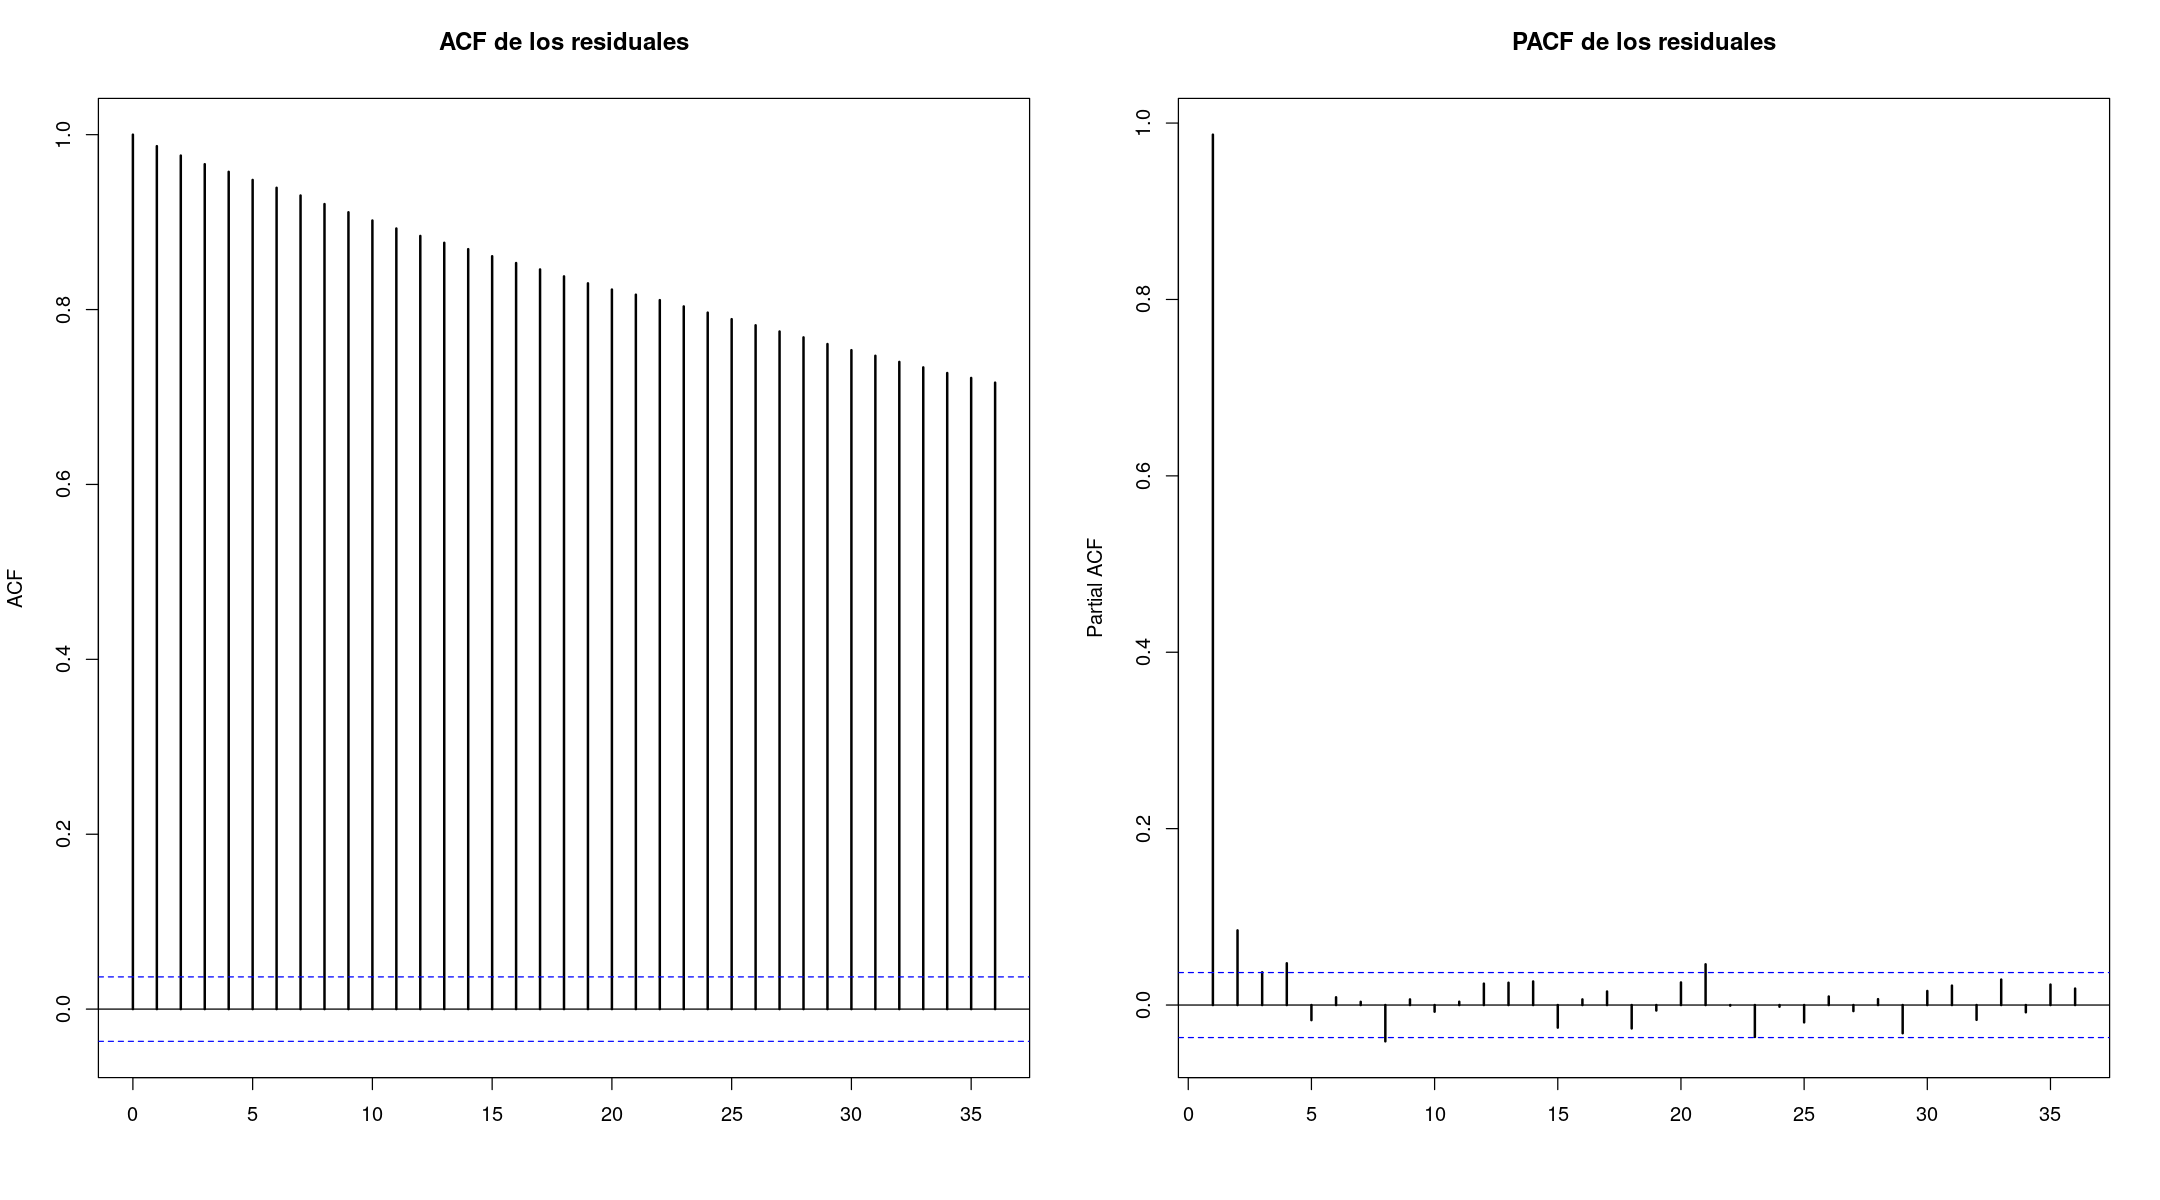

In [246]:
z_hat <- residuals(FS_EGADF)

par(mfrow=c(1,2))
acf(z_hat,lag.max=36,plot=T,lwd=2,xlab='',main='ACF de los residuales') 
pacf(z_hat,lag.max=36,plot=T,lwd=2,xlab='',main='PACF de los residuales')


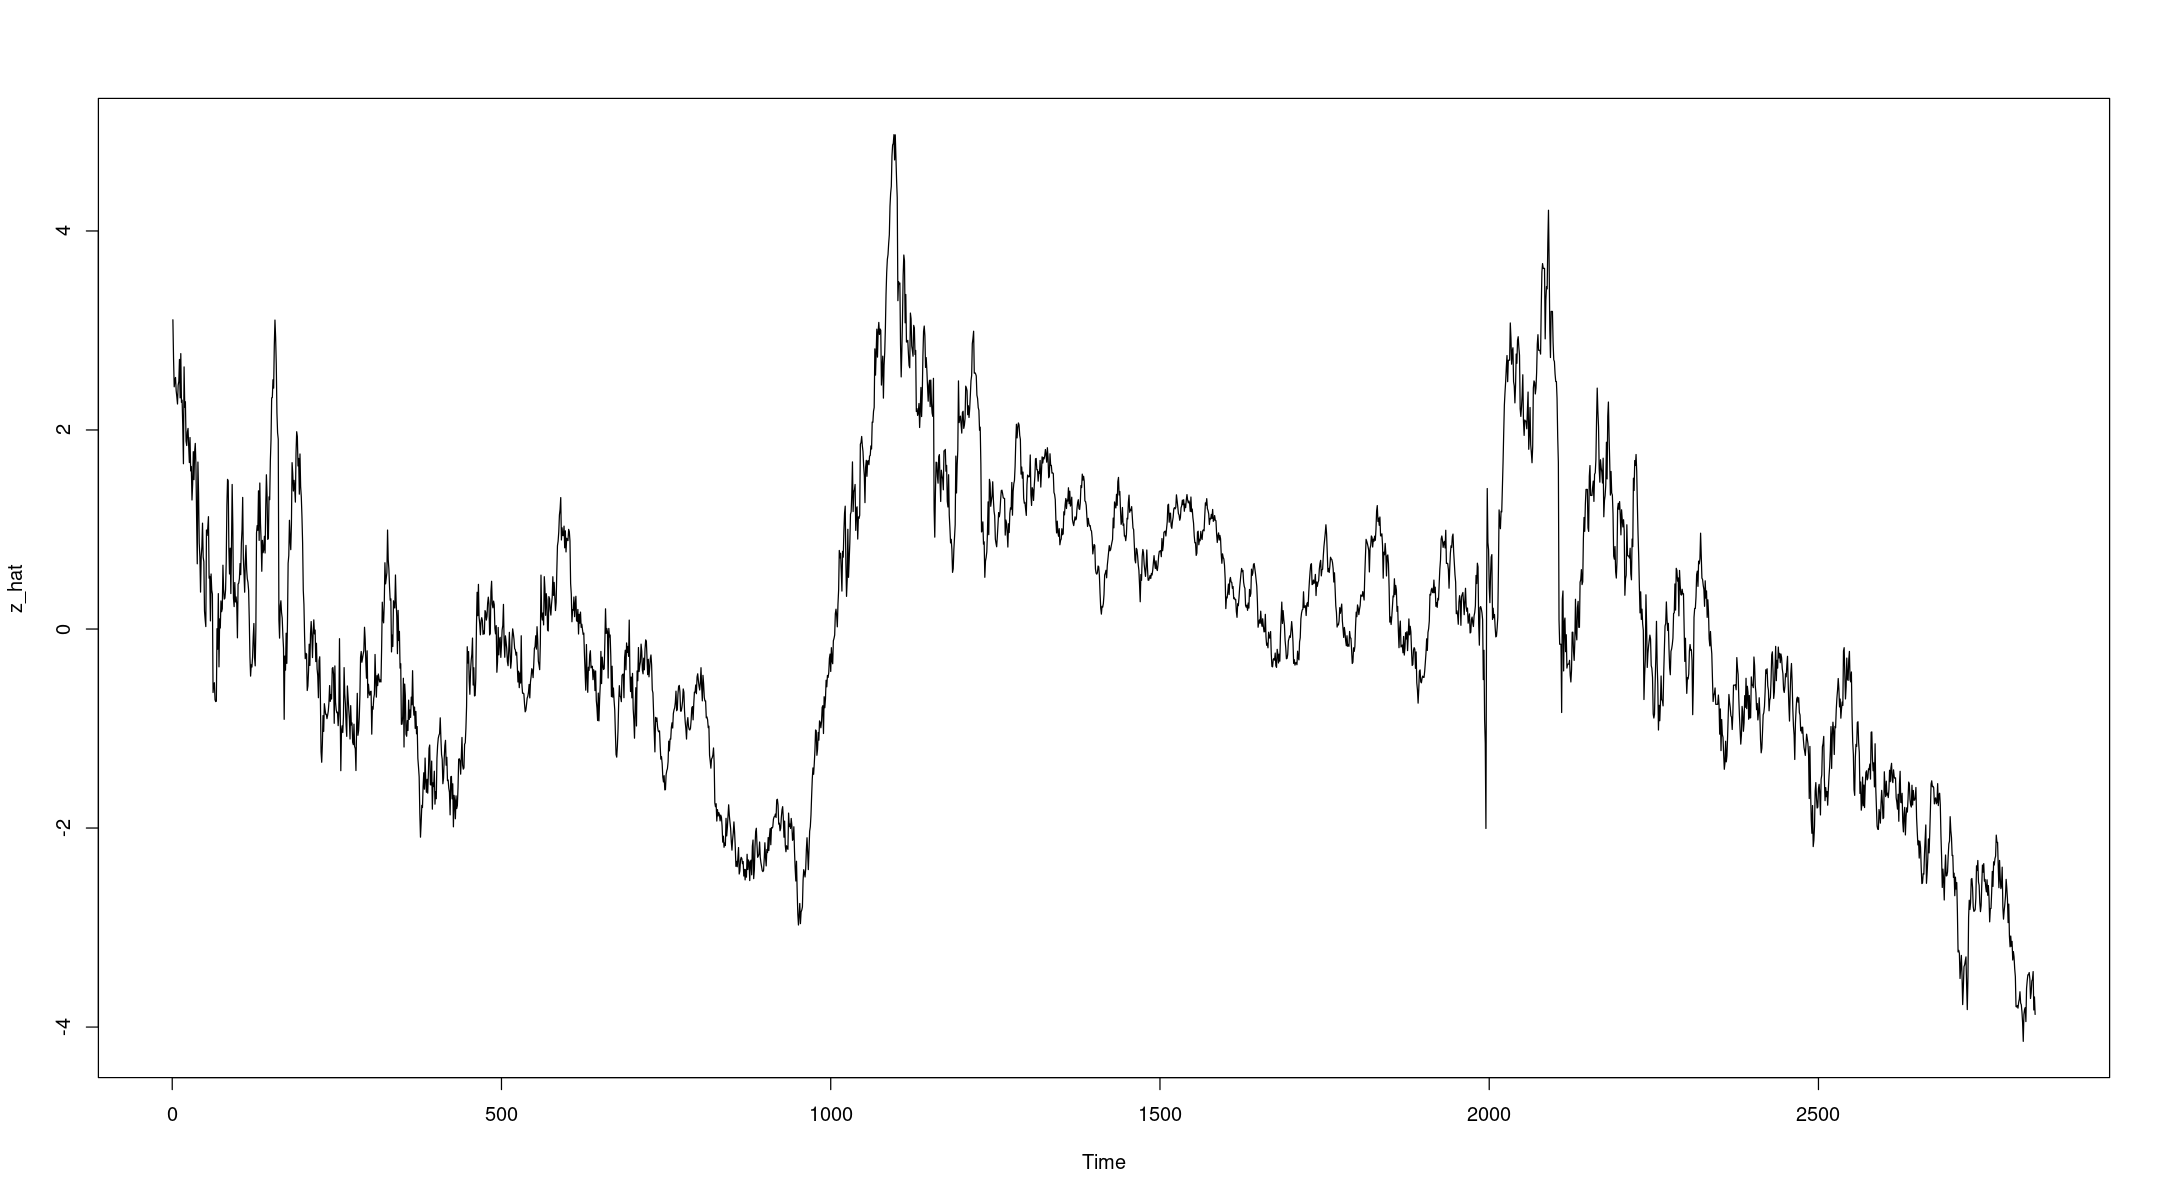

In [293]:
plot.ts(z_hat)


In [248]:
summary(ur.df(z_hat,lags=4,type = "none",selectlags = "AIC"))


############################################### 
# Augmented Dickey-Fuller Test Unit Root Test # 
############################################### 

Test regression none 


Call:
lm(formula = z.diff ~ z.lag.1 - 1 + z.diff.lag)

Residuals:
       Min         1Q     Median         3Q        Max 
-1.8352913 -0.1146623 -0.0008378  0.1115080  2.1208447 

Coefficients:
               Estimate  Std. Error  t value   Pr(>|t|)    
z.lag.1     -0.00845406  0.00281426 -3.00401  0.0026879 ** 
z.diff.lag1 -0.09580540  0.01885253 -5.08183 3.9822e-07 ***
z.diff.lag2 -0.04699383  0.01890884 -2.48528  0.0130024 *  
z.diff.lag3 -0.04808593  0.01882750 -2.55403  0.0107007 *  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.216397 on 2820 degrees of freedom
Multiple R-squared:  0.0167929,	Adjusted R-squared:  0.0153982 
F-statistic: 12.0412 on 4 and 2820 DF,  p-value: 1.05146e-09


Value of test-statistic is: -3.004 

Critical values for test statistics: 
   

In [291]:
FS_MCOD1 = dynlm(ts_SLVP ~ ts_SLV + L(d(ts_SLV),-1:1))
FS_MCOD2 = dynlm(ts_SLVP ~ ts_SLV + L(d(ts_SLV),-2:2))
FS_MCOD3 = dynlm(ts_SLVP ~ ts_SLV + L(d(ts_SLV),-3:3))
FS_MCOD4 = dynlm(ts_SLVP ~ ts_SLV + L(d(ts_SLV),-4:4))
FS_MCOD5 = dynlm(ts_SLVP ~ ts_SLV + L(d(ts_SLV),-5:5))
FS_MCOD6 = dynlm(ts_SLVP ~ ts_SLV + L(d(ts_SLV),-6:6))

cbind(AIC(FS_MCOD1), AIC(FS_MCOD2), AIC(FS_MCOD3), AIC(FS_MCOD4), AIC(FS_MCOD5),
      AIC(FS_MCOD6))

10164.7356,10149.8312,10134.6578,10121.0758,10108.2308,10096.6886


In [297]:
summary(FS_MCOD6)

tidy_FS_MCOD6 = tidy(FS_MCOD6)

coint_param_MCOD = tidy_FS_MCOD6$estimate[2]; coint_param_MCOD
residuals_FS_MCOD6 = residuals(FS_MCOD6)


Time series regression with "ts" data:
Start = 8, End = 2823

Call:
dynlm(formula = ts_SLVP ~ ts_SLV + L(d(ts_SLV), -6:6))

Residuals:
      Min        1Q    Median        3Q       Max 
-4.001892 -0.859107 -0.004200  0.968096  5.124761 

Coefficients:
                        Estimate  Std. Error   t value Pr(>|t|)    
(Intercept)          -2.38086379  0.11486087 -20.72824  < 2e-16 ***
ts_SLV                0.75929874  0.00586675 129.42405  < 2e-16 ***
L(d(ts_SLV), -6:6)-6  0.10446241  0.07913687   1.32002 0.186936    
L(d(ts_SLV), -6:6)-5  0.11496392  0.07916483   1.45221 0.146555    
L(d(ts_SLV), -6:6)-4  0.13126192  0.07895645   1.66246 0.096533 .  
L(d(ts_SLV), -6:6)-3  0.14338915  0.07900717   1.81489 0.069648 .  
L(d(ts_SLV), -6:6)-2  0.12914910  0.07897843   1.63525 0.102110    
L(d(ts_SLV), -6:6)-1  0.14462215  0.07900277   1.83060 0.067267 .  
L(d(ts_SLV), -6:6)0   0.06578011  0.07888349   0.83389 0.404414    
L(d(ts_SLV), -6:6)1   0.09681474  0.07888074   1.22736 0.219792    

[1] 0.759298744

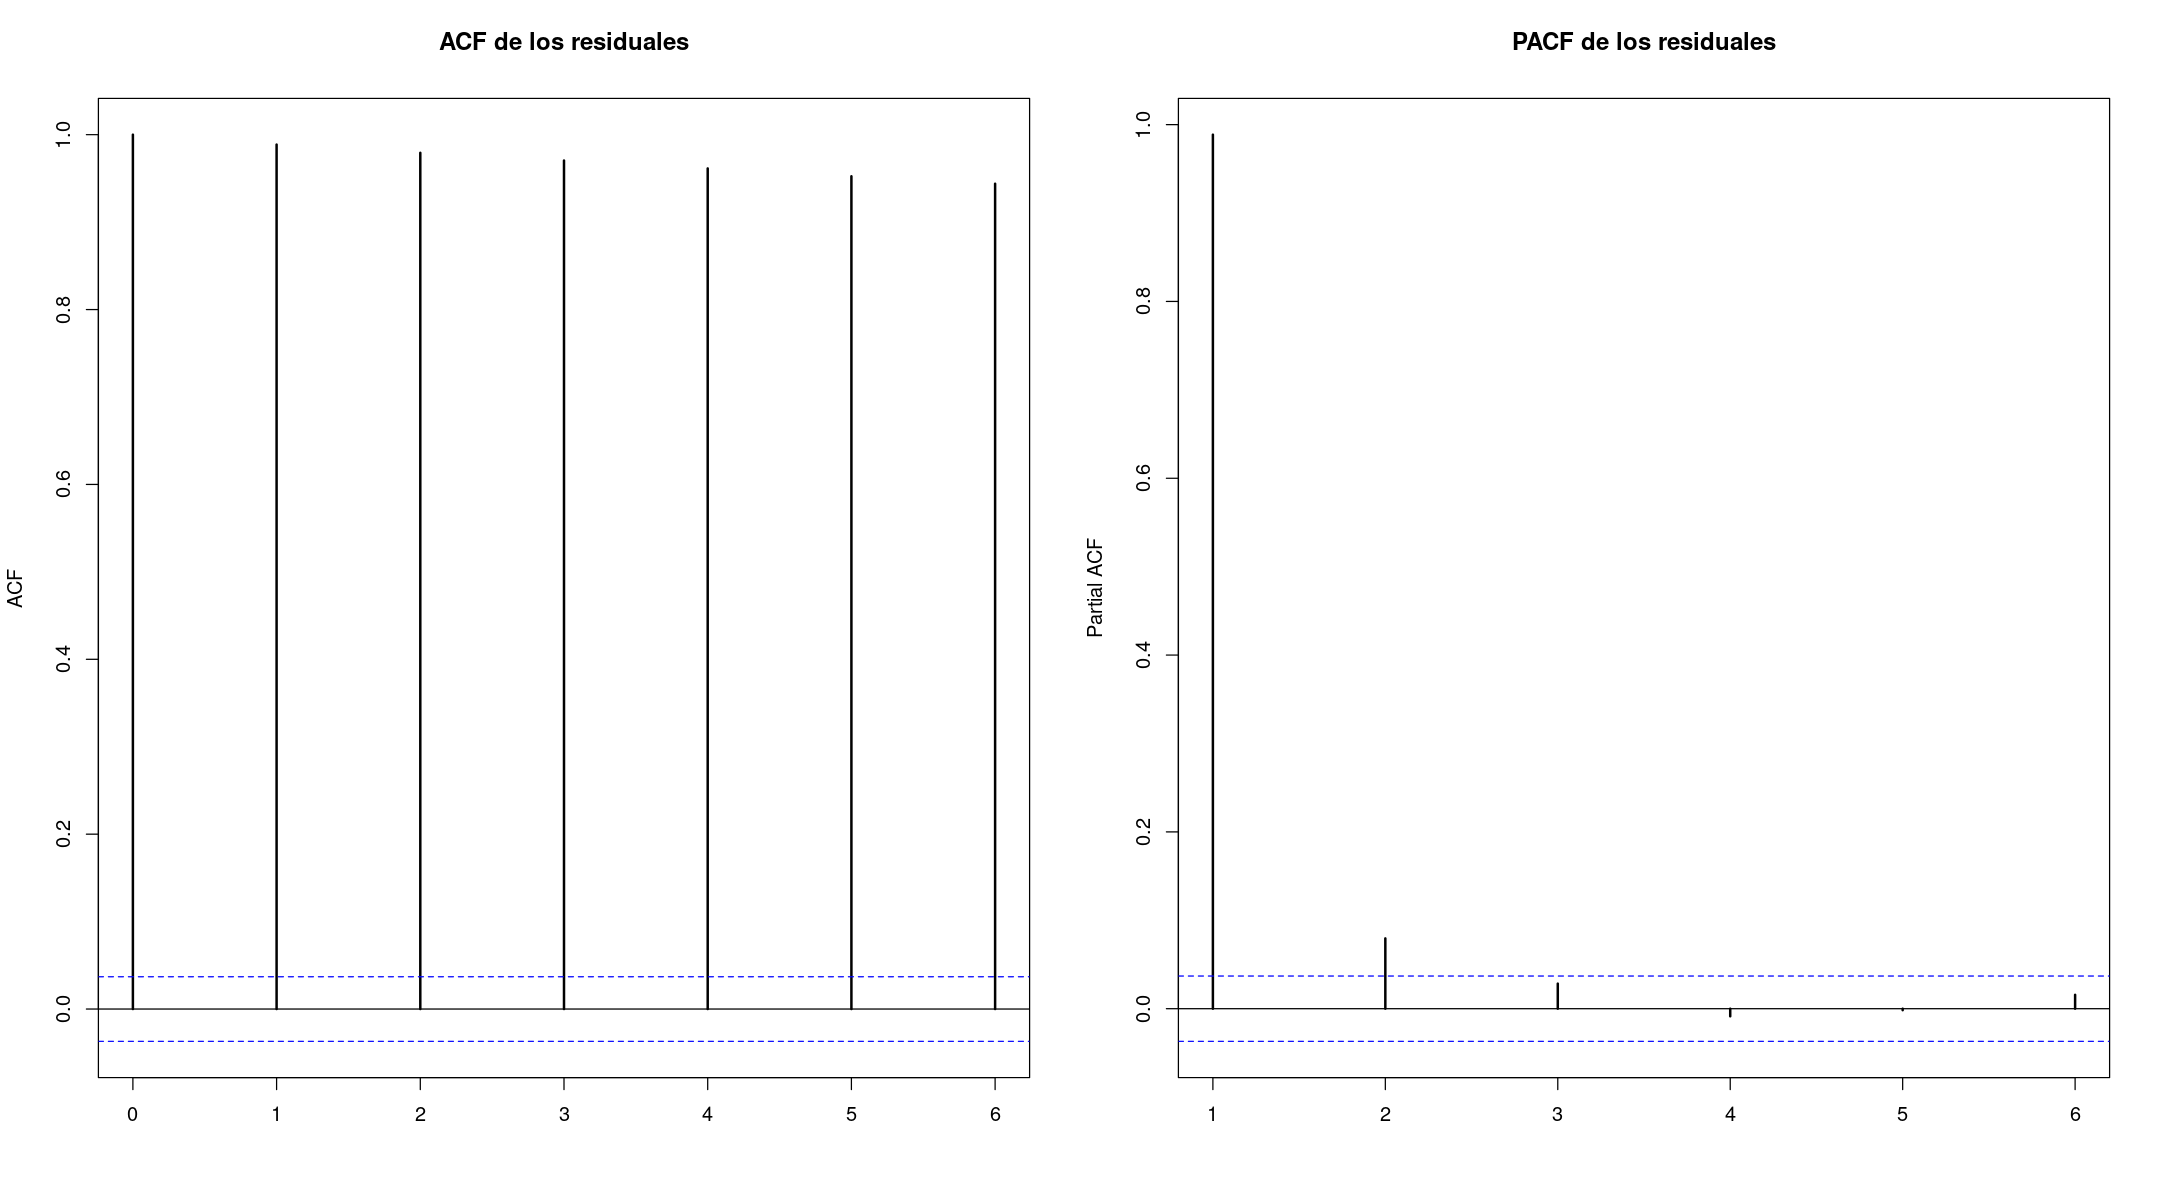

In [251]:
par(mfrow=c(1,2))
acf(residuals_FS_MCOD6, lag.max=lags, plot=T , lwd=2 , xlab='', main='ACF de los residuales') 
pacf(residuals_FS_MCOD6, lag.max=lags, plot=T, lwd=2, xlab='', main='PACF de los residuales')


############################################### 
# Augmented Dickey-Fuller Test Unit Root Test # 
############################################### 

Test regression none 


Call:
lm(formula = z.diff ~ z.lag.1 - 1 + z.diff.lag)

Residuals:
       Min         1Q     Median         3Q        Max 
-2.5106445 -0.1215733 -0.0040872  0.1222979  2.1002325 

Coefficients:
              Estimate  Std. Error  t value   Pr(>|t|)    
z.lag.1    -0.00817201  0.00268854 -3.03957   0.002391 ** 
z.diff.lag -0.08915558  0.01880252 -4.74168 2.2251e-06 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.249215 on 2812 degrees of freedom
Multiple R-squared:  0.0120176,	Adjusted R-squared:  0.0113149 
F-statistic: 17.1023 on 2 and 2812 DF,  p-value: 4.14357e-08


Value of test-statistic is: -3.0396 

Critical values for test statistics: 
      1pct  5pct 10pct
tau1 -2.58 -1.95 -1.62


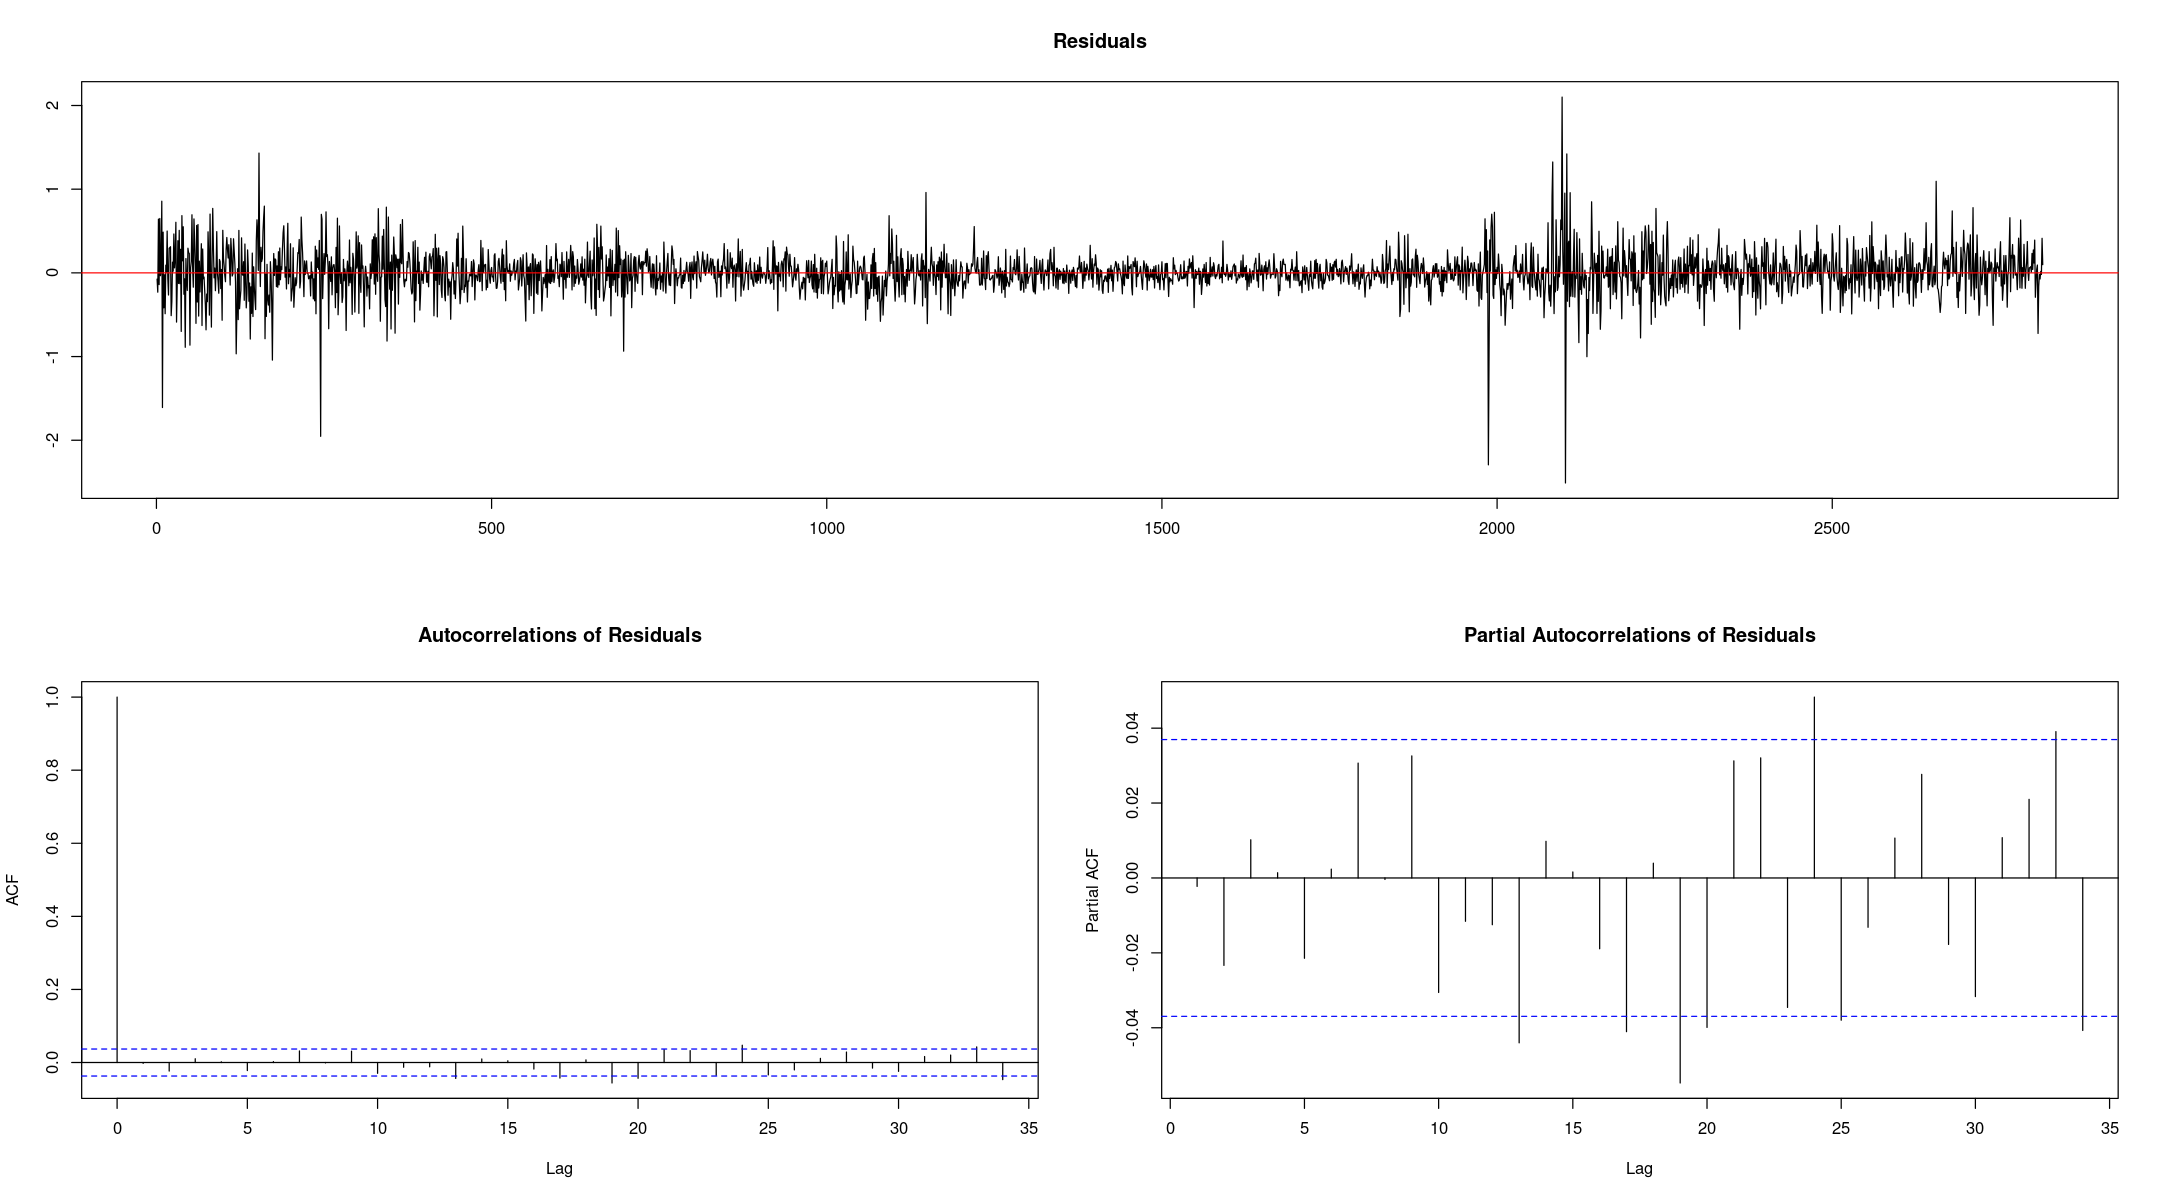

In [252]:
adf10 = ur.df(residuals(FS_MCOD6), lag=1, type = "none")
plot(adf10)
summary(adf10) #Residuales estacionarios

In [253]:
VEC_EQ1 <- dynlm(d(ts_SLV) ~  L(ts_SLV - coint_param_MCO * ts_SLVP,1) + L(d(ts_SLVP), 0:3) + L(d(ts_SLV), 1:3))

In [254]:
 
VEC_EQ2 <- dynlm(d(ts_SLVP) ~  L(ts_SLV - coint_param_MCO * ts_SLVP,1)+ L(d(ts_SLVP), 1:3) + L(d(ts_SLV), 0:3))

In [255]:
VEC_EQ3 <- dynlm(d(ts_SLV) ~  L(ts_SLV - coint_param_MCOD * ts_SLVP,1) + L(d(ts_SLVP), 0:3) + L(d(ts_SLV), 1:3))

In [256]:
 
VEC_EQ4 <- dynlm(d(ts_SLVP) ~  L(ts_SLV - coint_param_MCOD * ts_SLVP,1)+ L(d(ts_SLVP), 1:3) + L(d(ts_SLV), 0:3))

In [257]:
residuales_VEC_EQ3 = residuals(VEC_EQ3)
residuales_VEC_EQ4 = residuals(VEC_EQ4)

In [258]:
adf_VEC_EQ3 = ur.df(residuales_VEC_EQ3, lag=1, type = "none")
summary(adf_VEC_EQ3) # Residuales estacionarios. 

# Ecuación VEC_EQ4
adf_VEC_EQ4 = ur.df(residuales_VEC_EQ4, lag=1, type = "none")
summary(adf_VEC_EQ4) #Residuales estacionarios.


############################################### 
# Augmented Dickey-Fuller Test Unit Root Test # 
############################################### 

Test regression none 


Call:
lm(formula = z.diff ~ z.lag.1 - 1 + z.diff.lag)

Residuals:
       Min         1Q     Median         3Q        Max 
-2.3847995 -0.1096164 -0.0050131  0.1166084  2.0533747 

Coefficients:
               Estimate   Std. Error   t value Pr(>|t|)    
z.lag.1    -9.99781e-01  2.66283e-02 -37.54585  < 2e-16 ***
z.diff.lag  9.64169e-05  1.88330e-02   0.00512  0.99592    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.232062 on 2821 degrees of freedom
Multiple R-squared:  0.499699,	Adjusted R-squared:  0.499344 
F-statistic:  1408.8 on 2 and 2821 DF,  p-value: < 2.22e-16


Value of test-statistic is: -37.5458 

Critical values for test statistics: 
      1pct  5pct 10pct
tau1 -2.58 -1.95 -1.62



############################################### 
# Augmented Dickey-Fuller Test Unit Root Test # 
############################################### 

Test regression none 


Call:
lm(formula = z.diff ~ z.lag.1 - 1 + z.diff.lag)

Residuals:
       Min         1Q     Median         3Q        Max 
-1.8151573 -0.1119952  0.0038008  0.1114497  2.0463238 

Coefficients:
               Estimate   Std. Error   t value Pr(>|t|)    
z.lag.1    -9.99283e-01  2.66184e-02 -37.54110  < 2e-16 ***
z.diff.lag -8.61539e-05  1.88290e-02  -0.00458  0.99635    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.214501 on 2821 degrees of freedom
Multiple R-squared:  0.499659,	Adjusted R-squared:  0.499304 
F-statistic: 1408.58 on 2 and 2821 DF,  p-value: < 2.22e-16


Value of test-statistic is: -37.5411 

Critical values for test statistics: 
      1pct  5pct 10pct
tau1 -2.58 -1.95 -1.62


In [259]:
length(residuales_VEC_EQ3)/4 # aproximdamente 94

# Test Box-Pierce para autocorrelación en los residuales
Box.test(residuales_VEC_EQ3,lag=length(residuales_VEC_EQ3)/4, type = c("Box-Pierce")) #No rechazo H0, se cumple el supuesto. 
Box.test(residuales_VEC_EQ3,type='Box-Pierce',lag=20) #No rechazo H0, se cumple el supuesto. 
Box.test(residuales_VEC_EQ3,type='Box-Pierce',lag=30) #No rechazo H0,  se cumple el supuesto.

Box.test(residuales_VEC_EQ4,lag=length(residuales_VEC_EQ3)/4, type = c("Ljung-Box")) #NO rechazo H0, se cumple el supuesto. 
Box.test(residuales_VEC_EQ4,type='Ljung-Box',lag=20) 
Box.test(residuales_VEC_EQ4,type='Ljung-Box',lag=30) 

[1] 706.25


	Box-Pierce test

data:  residuales_VEC_EQ3
X-squared = 572.3831, df = 706.25, p-value = 0.999927



	Box-Pierce test

data:  residuales_VEC_EQ3
X-squared = 36.2291, df = 20, p-value = 0.0144543



	Box-Pierce test

data:  residuales_VEC_EQ3
X-squared = 54.87094, df = 30, p-value = 0.00367121



	Box-Ljung test

data:  residuales_VEC_EQ4
X-squared = 648.3969, df = 706.25, p-value = 0.941282



	Box-Ljung test

data:  residuales_VEC_EQ4
X-squared = 26.34499, df = 20, p-value = 0.154718



	Box-Ljung test

data:  residuales_VEC_EQ4
X-squared = 39.52152, df = 30, p-value = 0.114469


In [260]:
library(aTSA)

coint.test(y=ts_SLVP, X=ts_SLV)

Response: ts_SLVP 
Input: ts_SLV 
Number of inputs: 1 
Model: y ~ X + 1 
------------------------------- 
Engle-Granger Cointegration Test 
alternative: cointegrated 

Type 1: no trend 
    lag      EG p.value 
 8.0000 -3.0952  0.0337 
----- 
 Type 2: linear trend 
    lag      EG p.value 
  8.000  -0.984   0.100 
----- 
 Type 3: quadratic trend 
    lag      EG p.value 
   8.00    2.06    0.10 
----------- 
Note: p.value = 0.01 means p.value <= 0.01 
    : p.value = 0.10 means p.value >= 0.10 


In [261]:
library(vars)

Y = cbind(d.ts_SLV, d.ts_SLVP)

VARselect(Y, lag.max = 6, type="both", season=NULL)$selection
VARselect(Y, lag.max = 6, type="const", season=NULL)$selection
VARselect(Y, lag.max = 6, type="none", season=NULL)$selection

AIC(n)  HQ(n)  SC(n) FPE(n) 
     3      1      1      3

AIC(n)  HQ(n)  SC(n) FPE(n) 
     3      1      1      3

AIC(n)  HQ(n)  SC(n) FPE(n) 
     3      1      1      3

In [262]:
# summary(VAR(Y, p=3, type="both", season=NULL))
# summary(VAR(Y, p=1, type="const", season=NULL))
summary(VAR(Y, p=1, type="none", season=NULL))


VAR Estimation Results:
Endogenous variables: d.ts_SLV, d.ts_SLVP 
Deterministic variables: none 
Sample size: 2827 
Log Likelihood: -685.142 
Roots of the characteristic polynomial:
0.104614 0.00764414
Call:
VAR(y = Y, p = 1, type = "none")


Estimation results for equation d.ts_SLV: 
d.ts_SLV = d.ts_SLV.l1 + d.ts_SLVP.l1 

               Estimate Std. Error  t value Pr(>|t|)  
d.ts_SLV.l1  -0.0634295  0.0278297 -2.27920 0.022730 *
d.ts_SLVP.l1  0.0515818  0.0301292  1.71202 0.087002 .
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


Residual standard error: 0.346683 on 2825 degrees of freedom
Multiple R-Squared: 0.00183624,	Adjusted R-squared: 0.00112957 
F-statistic: 2.59846 on 2 and 2825 DF,  p-value: 0.074566 


Estimation results for equation d.ts_SLVP: 
d.ts_SLVP = d.ts_SLV.l1 + d.ts_SLVP.l1 

               Estimate Std. Error  t value Pr(>|t|)  
d.ts_SLV.l1   0.0445402  0.0257030  1.73288 0.083226 .
d.ts_SLVP.l1 -0.0488282  0.0278267 -1.75473 0.079414 .
--

In [263]:
VAR <- VAR(Y, p=1, type="none", season=NULL) # modelo var(2) sin constante y sin tendencia

#Vamos a analizar el comportamiento de los residuales, si no se comportan bien incluiremos mas rezagos ´
serial.test(VAR, lags.pt = length(ts_SLV)/4, type = "PT.asymptotic")
serial.test(VAR, lags.pt = length(ts_SLV)/6, type = "PT.asymptotic")
serial.test(VAR, lags.pt = length(ts_SLV)/8, type = "PT.asymptotic")
serial.test(VAR, lags.pt = length(ts_SLV)/10, type = "PT.asymptotic")


	Portmanteau Test (asymptotic)

data:  Residuals of VAR object VAR
Chi-squared = 2374.097, df = 2824, p-value = 1

$serial

	Portmanteau Test (asymptotic)

data:  Residuals of VAR object VAR
Chi-squared = 2374.097, df = 2824, p-value = 1




	Portmanteau Test (asymptotic)

data:  Residuals of VAR object VAR
Chi-squared = 1911.612, df = 1880, p-value = 0.300304

$serial

	Portmanteau Test (asymptotic)

data:  Residuals of VAR object VAR
Chi-squared = 1911.612, df = 1880, p-value = 0.300304




	Portmanteau Test (asymptotic)

data:  Residuals of VAR object VAR
Chi-squared = 1564.29, df = 1408, p-value = 0.00215028

$serial

	Portmanteau Test (asymptotic)

data:  Residuals of VAR object VAR
Chi-squared = 1564.29, df = 1408, p-value = 0.00215028




	Portmanteau Test (asymptotic)

data:  Residuals of VAR object VAR
Chi-squared = 1350.309, df = 1124, p-value = 3.40279e-06

$serial

	Portmanteau Test (asymptotic)

data:  Residuals of VAR object VAR
Chi-squared = 1350.309, df = 1124, p-value = 3.40279e-06



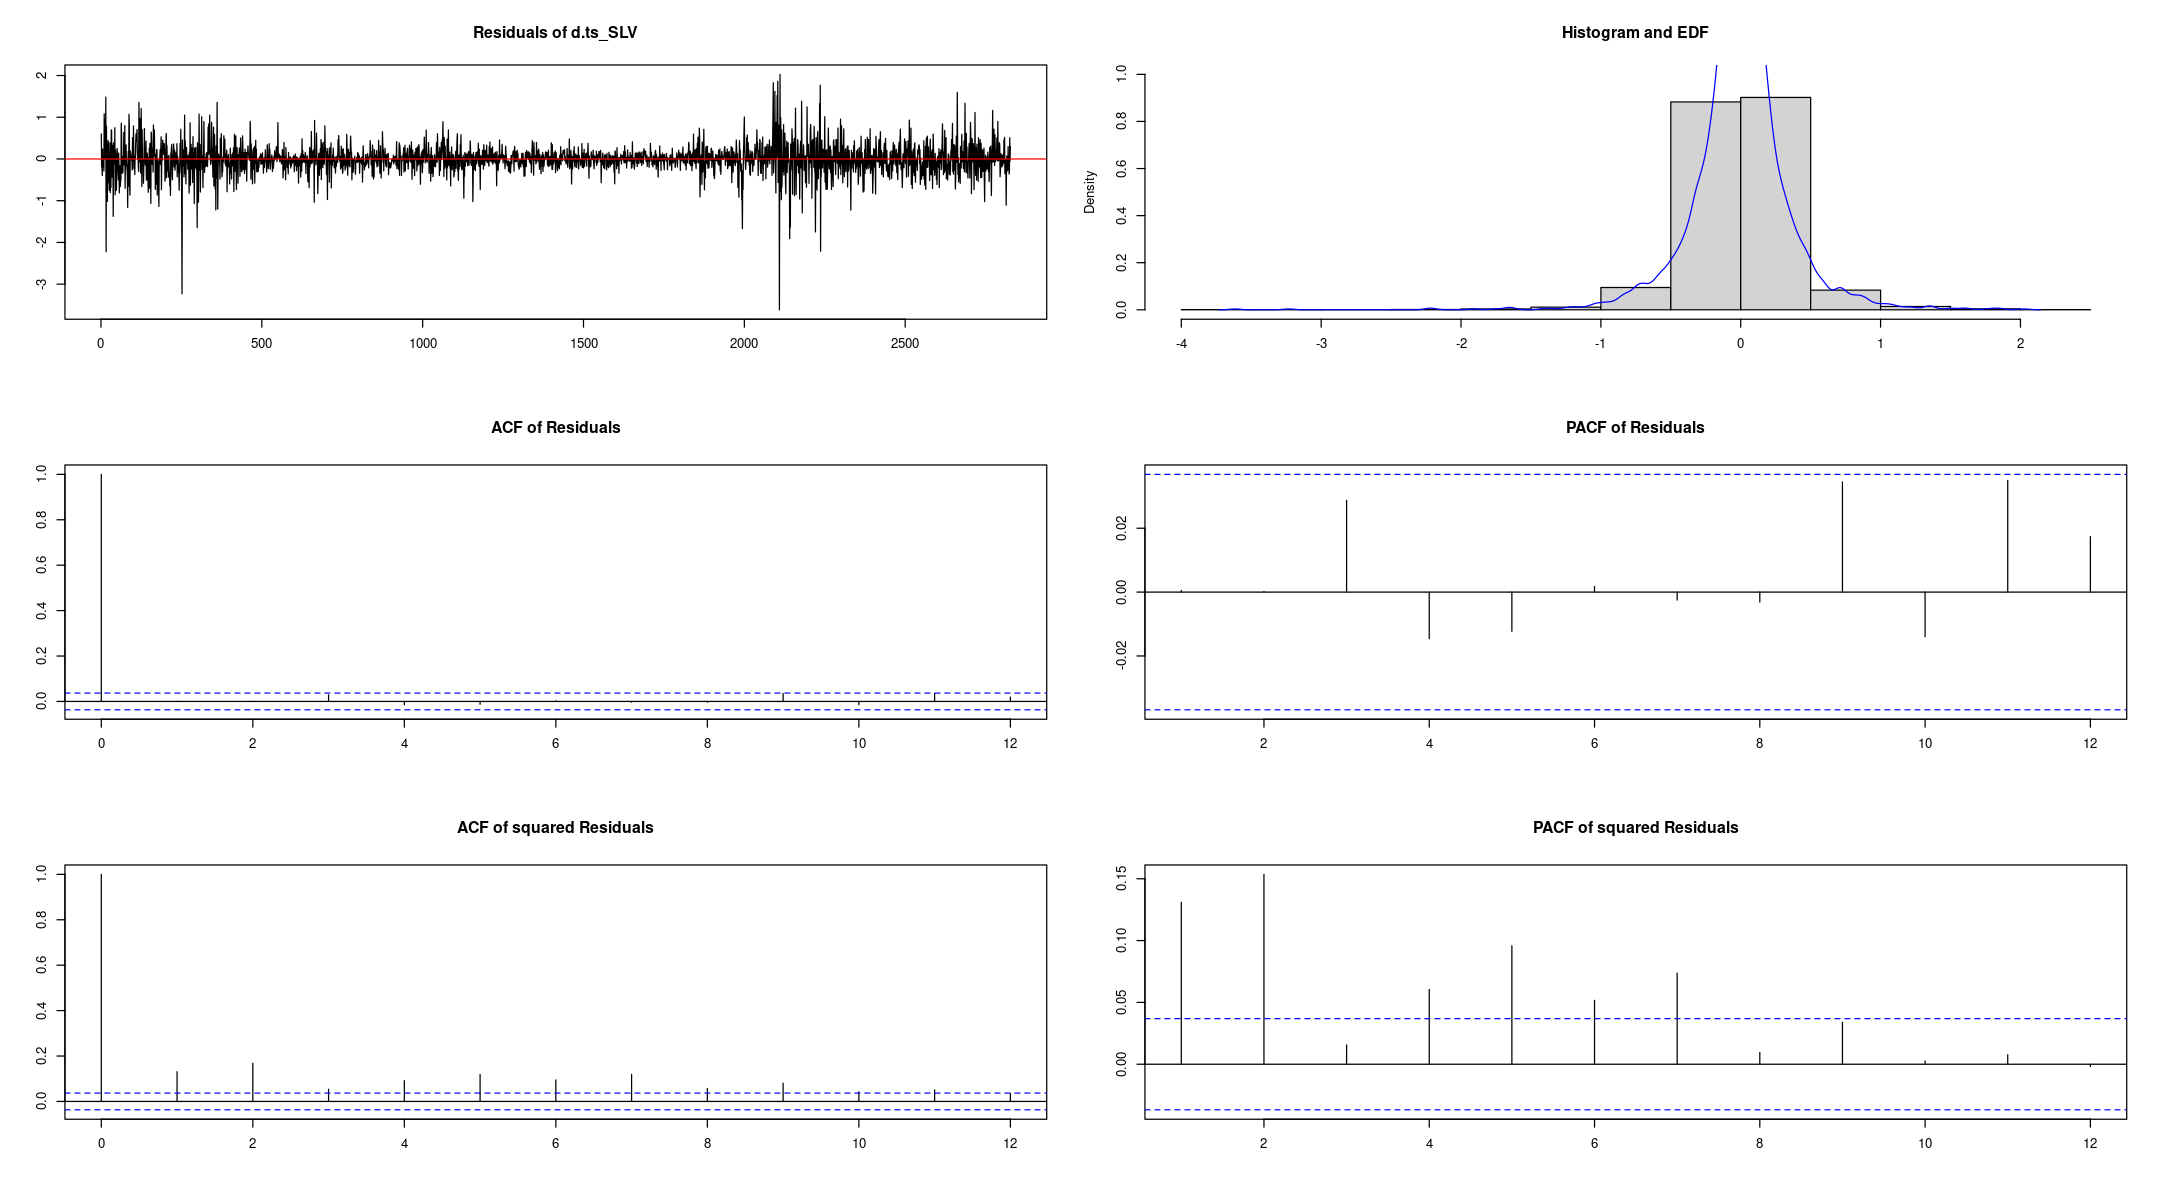

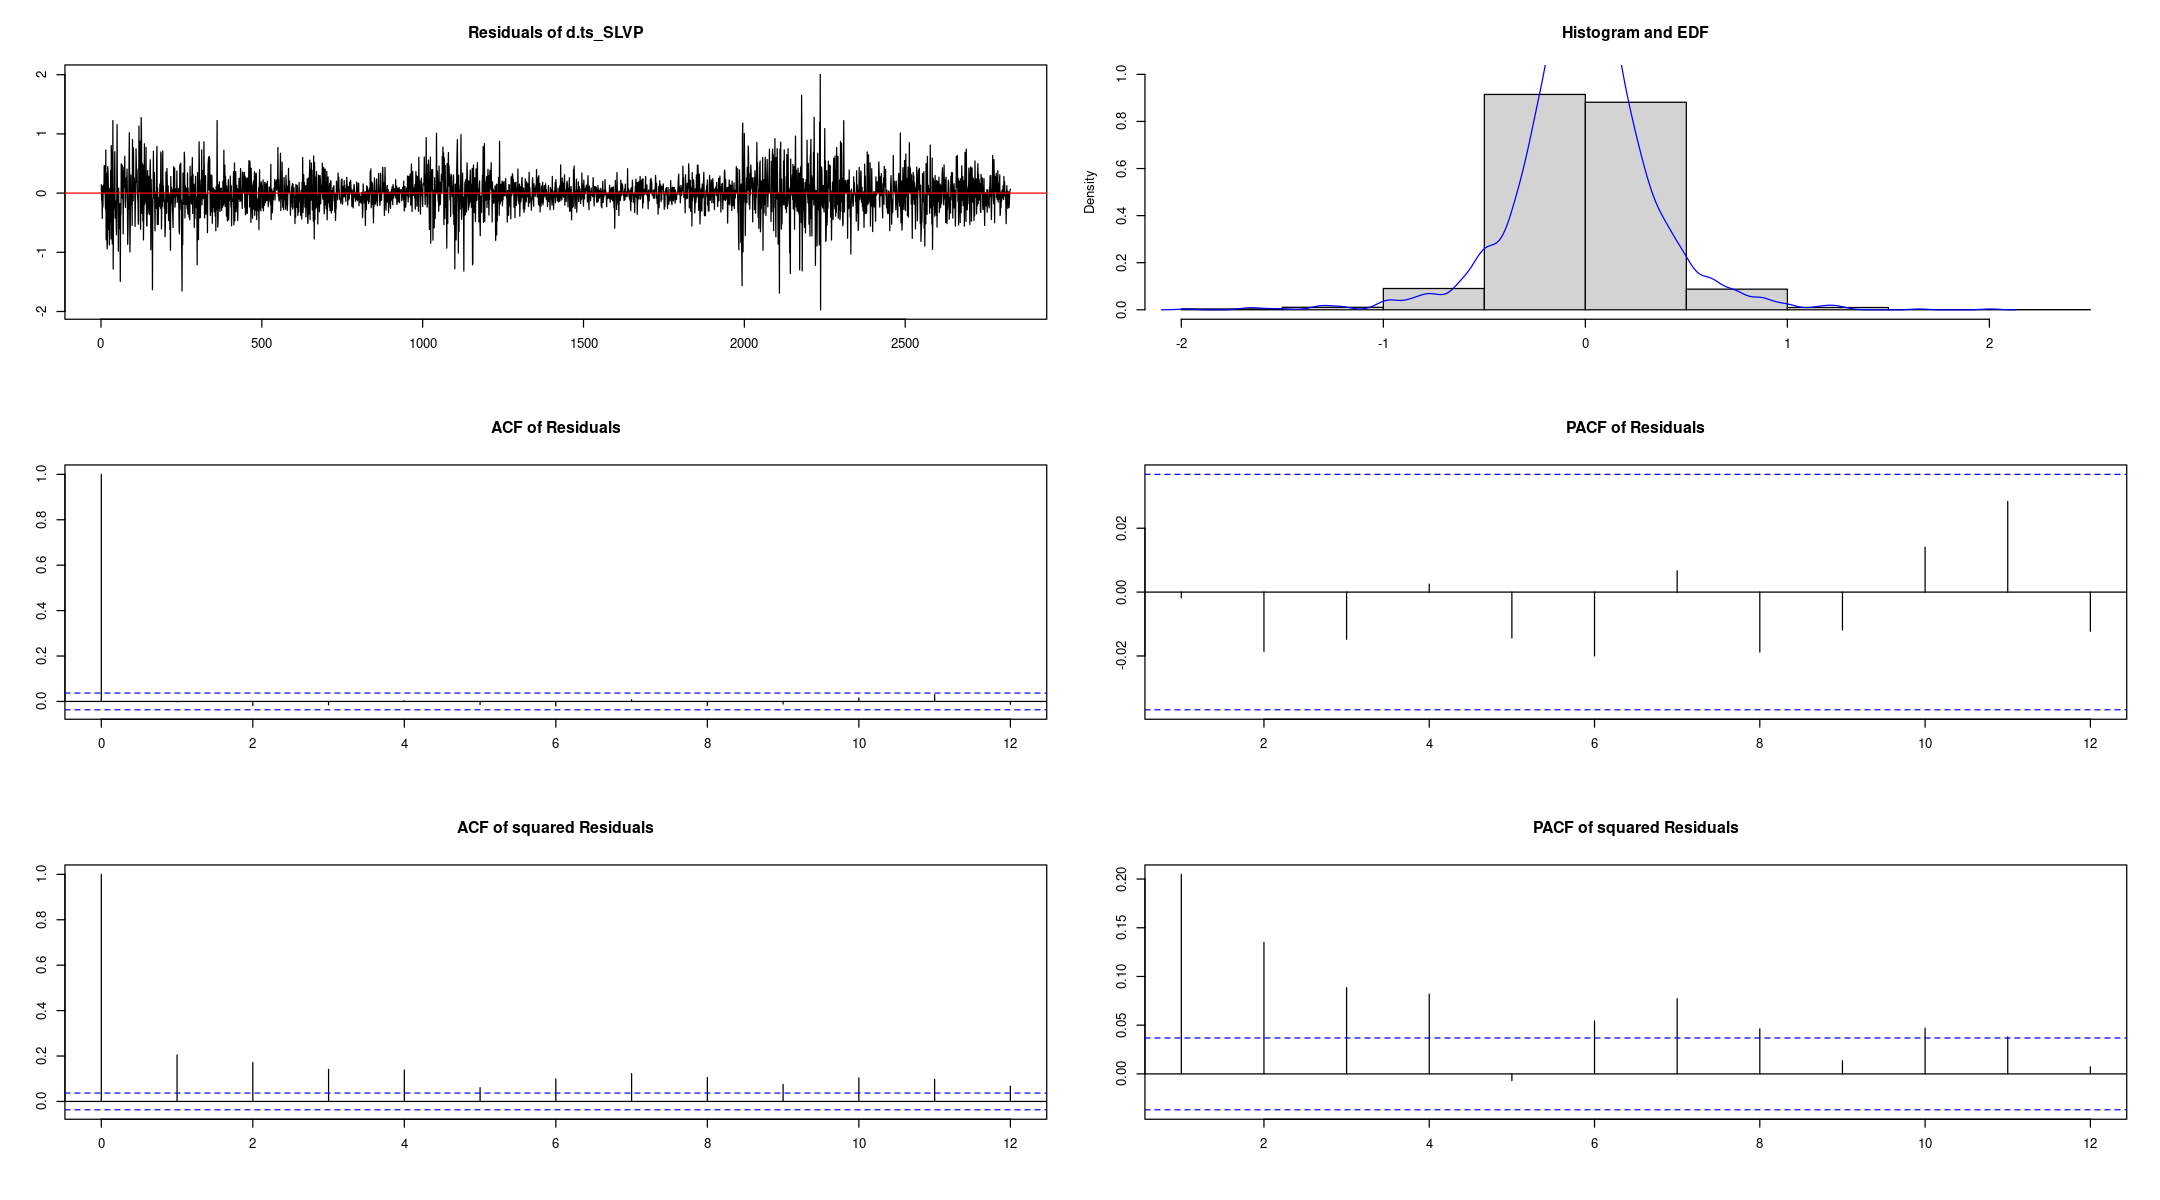

In [264]:
plot(serial.test(VAR, lags.pt = length(ts_SLV)/4, type = "PT.asymptotic"), names = "d.ts_SLV")
plot(serial.test(VAR, lags.pt = length(ts_SLV)/4, type = "PT.asymptotic"), names = "d.ts_SLVP")

In [298]:
eigen1 = ca.jo(cbind(ts_SLV, ts_SLVP), ecdet = "none",K = 2,spec = "longrun")
summary(eigen1)


###################### 
# Johansen-Procedure # 
###################### 

Test type: maximal eigenvalue statistic (lambda max) , with linear trend 

Eigenvalues (lambda):
[1] 0.00492985417 0.00393991802

Values of teststatistic and critical values of test:

          test 10pct  5pct  1pct
r <= 1 | 11.16  6.50  8.18 11.65
r = 0  | 13.97 12.91 14.90 19.19

Eigenvectors, normalised to first column:
(These are the cointegration relations)

             ts_SLV.l2   ts_SLVP.l2
ts_SLV.l2   1.00000000  1.000000000
ts_SLVP.l2 -1.61767272 -0.701455973

Weights W:
(This is the loading matrix)

                ts_SLV.l2     ts_SLVP.l2
ts_SLV.d  -0.000756503646 -0.00890343033
ts_SLVP.d  0.005291089824 -0.00653187961


In [266]:
trace1= ca.jo(cbind(ts_SLV, ts_SLVP), ecdet = "none", type = "trace", K = 2, spec = "longrun",season = NULL)
summary(trace1) 


###################### 
# Johansen-Procedure # 
###################### 

Test type: trace statistic , with linear trend 

Eigenvalues (lambda):
[1] 0.00492985417 0.00393991802

Values of teststatistic and critical values of test:

          test 10pct  5pct  1pct
r <= 1 | 11.16  6.50  8.18 11.65
r = 0  | 25.13 15.66 17.95 23.52

Eigenvectors, normalised to first column:
(These are the cointegration relations)

             ts_SLV.l2   ts_SLVP.l2
ts_SLV.l2   1.00000000  1.000000000
ts_SLVP.l2 -1.61767272 -0.701455973

Weights W:
(This is the loading matrix)

                ts_SLV.l2     ts_SLVP.l2
ts_SLV.d  -0.000756503646 -0.00890343033
ts_SLVP.d  0.005291089824 -0.00653187961


In [267]:
roots(VAR)
Acoef(VAR)

[1] 0.1046135297 0.0076441424

,d.ts_SLV.l1,d.ts_SLVP.l1
d.ts_SLV,-0.0634294996,0.0515818158
d.ts_SLVP,0.0445402279,-0.0488281725


In [268]:
summary(VAR)$covres

,d.ts_SLV,d.ts_SLVP
d.ts_SLV,0.1201742736,0.0821244861
d.ts_SLVP,0.0821244861,0.1024921707


In [269]:
P.94.1=serial.test(VAR, lags.pt = length(ts_SLV)/4, type = "PT.asymptotic");P.94.1 #No rechazo, se cumple el supuesto
P.75.1=serial.test(VAR, lags.pt = length(ts_SLV)/6, type = "PT.asymptotic");P.75.1 #No rechazo, se cumple el supuesto
P.60.1=serial.test(VAR, lags.pt = length(ts_SLV)/8, type = "PT.asymptotic");P.60.1  #rechazo,No se cumple el supuesto
P.60.1=serial.test(VAR, lags.pt = length(ts_SLV)/10, type = "PT.asymptotic");P.60.1  #rechazo,No se cumple el supuesto


	Portmanteau Test (asymptotic)

data:  Residuals of VAR object VAR
Chi-squared = 2374.097, df = 2824, p-value = 1

$serial

	Portmanteau Test (asymptotic)

data:  Residuals of VAR object VAR
Chi-squared = 2374.097, df = 2824, p-value = 1




	Portmanteau Test (asymptotic)

data:  Residuals of VAR object VAR
Chi-squared = 1911.612, df = 1880, p-value = 0.300304

$serial

	Portmanteau Test (asymptotic)

data:  Residuals of VAR object VAR
Chi-squared = 1911.612, df = 1880, p-value = 0.300304




	Portmanteau Test (asymptotic)

data:  Residuals of VAR object VAR
Chi-squared = 1564.29, df = 1408, p-value = 0.00215028

$serial

	Portmanteau Test (asymptotic)

data:  Residuals of VAR object VAR
Chi-squared = 1564.29, df = 1408, p-value = 0.00215028




	Portmanteau Test (asymptotic)

data:  Residuals of VAR object VAR
Chi-squared = 1350.309, df = 1124, p-value = 3.40279e-06

$serial

	Portmanteau Test (asymptotic)

data:  Residuals of VAR object VAR
Chi-squared = 1350.309, df = 1124, p-value = 3.40279e-06



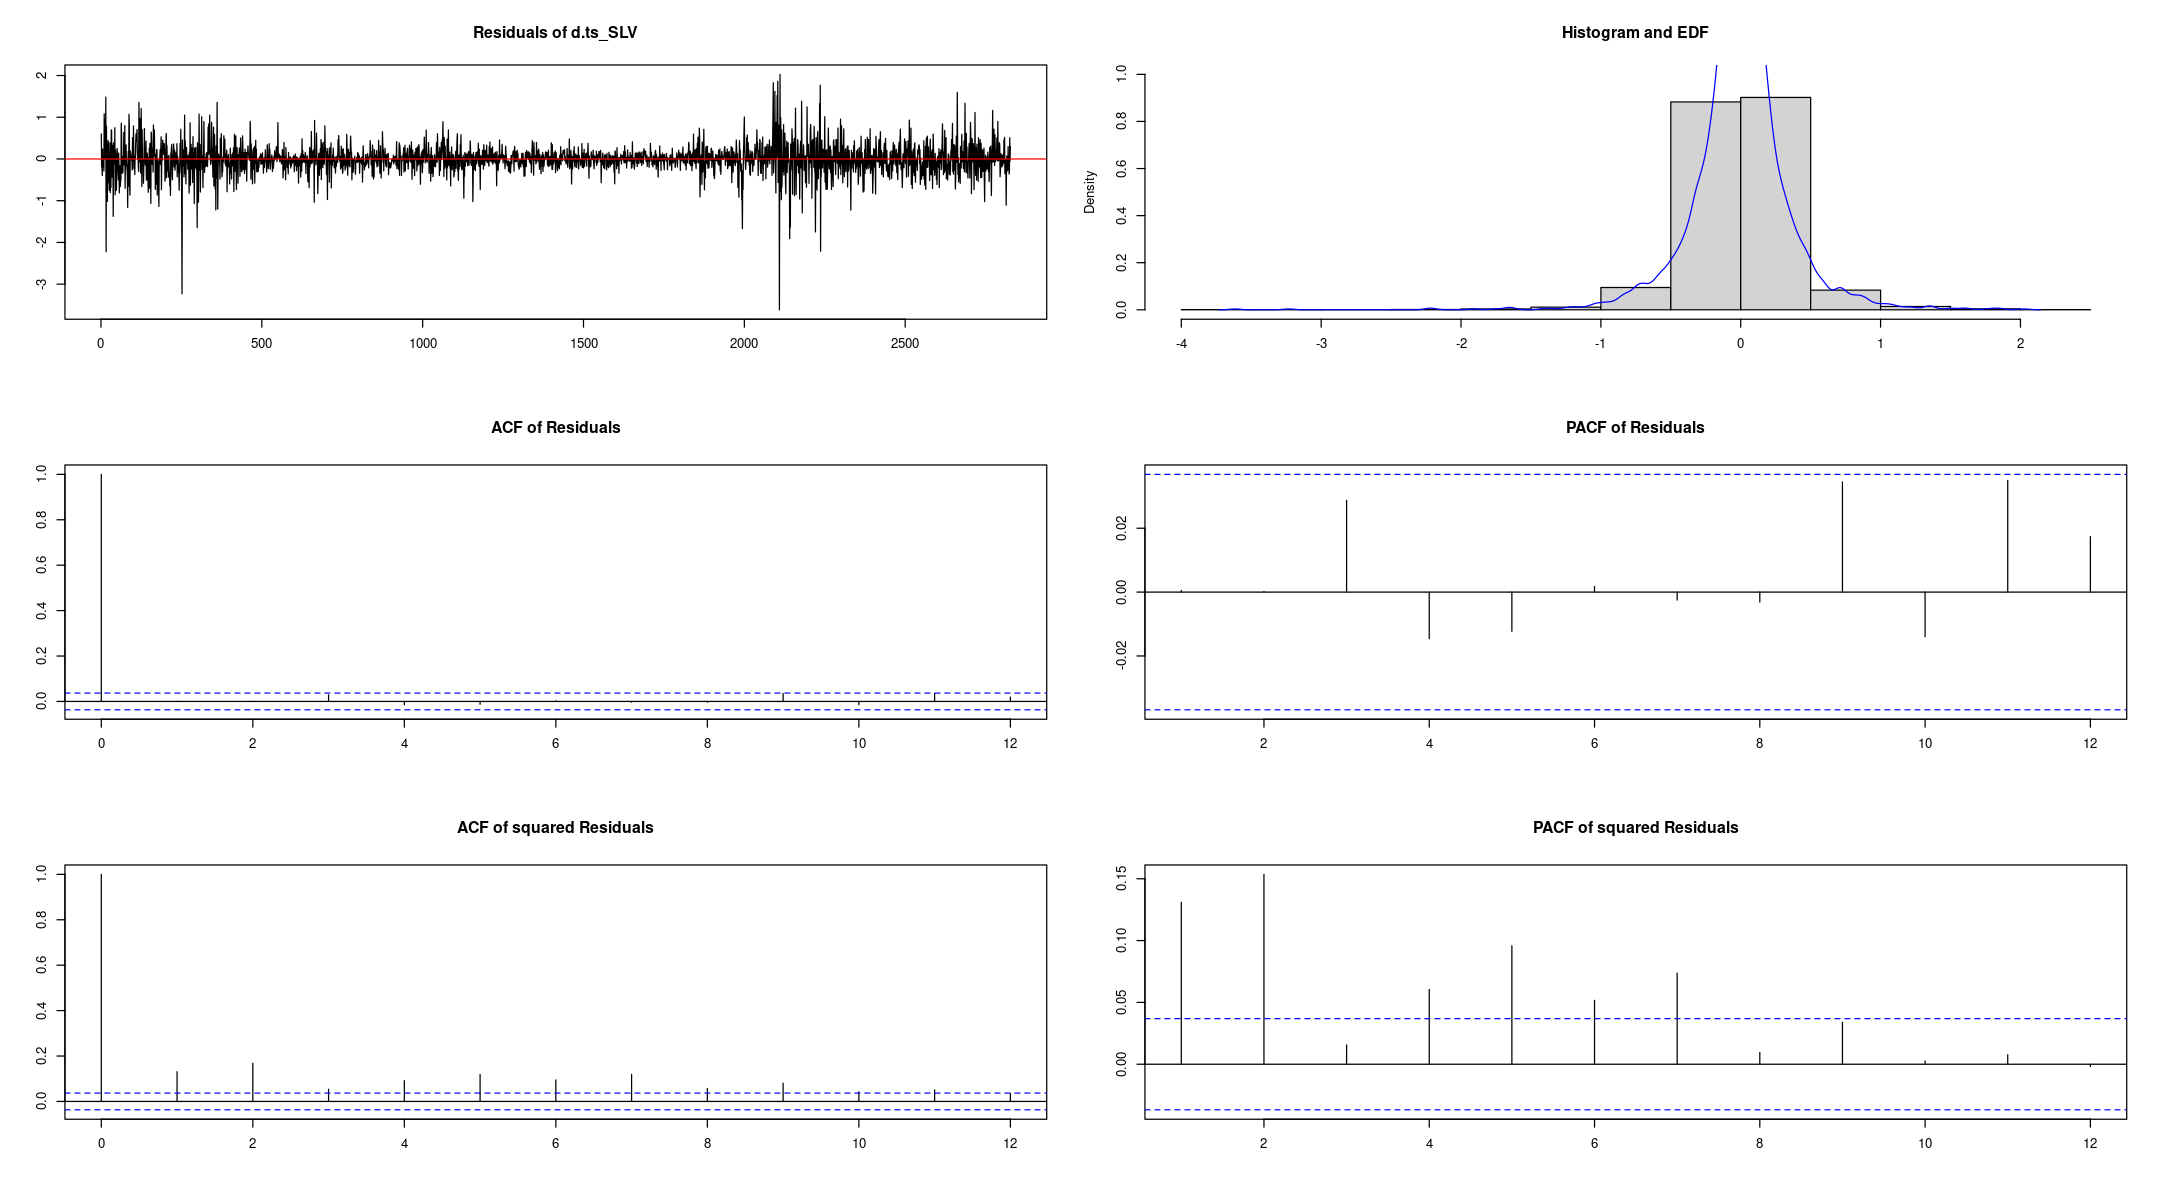

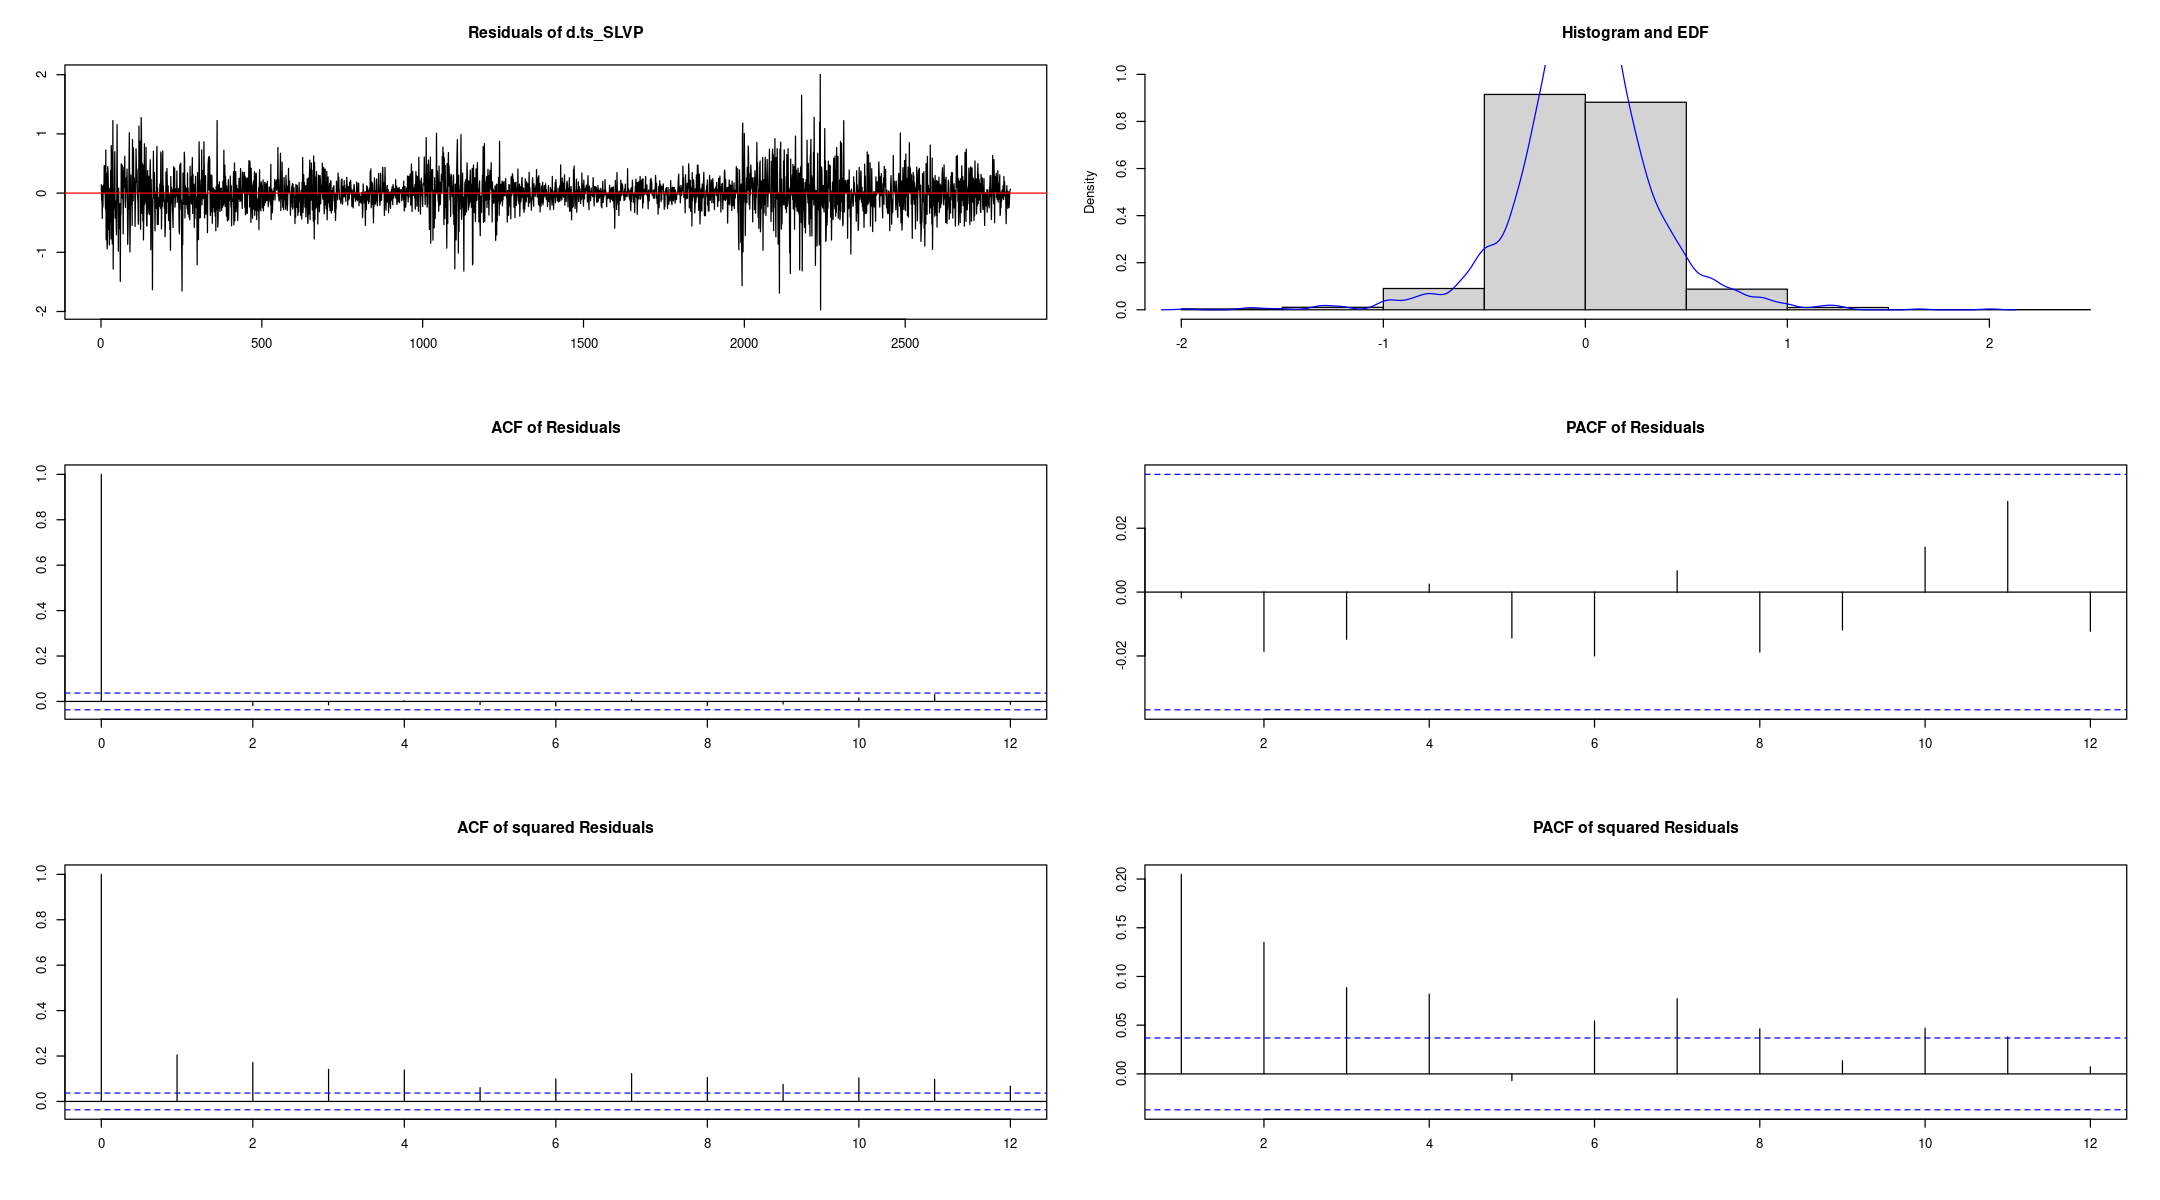

In [270]:
plot(P.94.1, names = "d.ts_SLV") #Relativamente Bien comportados, salvo por normalidad
plot(P.94.1, names = "d.ts_SLVP")

In [271]:
arch.test(VAR, lags.multi = 20, multivariate.only = TRUE) #no se cumple
arch.test(VAR, lags.multi = 10, multivariate.only = TRUE) # no se cumple


	ARCH (multivariate)

data:  Residuals of VAR object VAR
Chi-squared = 948.9636, df = 180, p-value < 2.22e-16

$arch.mul

	ARCH (multivariate)

data:  Residuals of VAR object VAR
Chi-squared = 948.9636, df = 180, p-value < 2.22e-16




	ARCH (multivariate)

data:  Residuals of VAR object VAR
Chi-squared = 778.3422, df = 90, p-value < 2.22e-16

$arch.mul

	ARCH (multivariate)

data:  Residuals of VAR object VAR
Chi-squared = 778.3422, df = 90, p-value < 2.22e-16



In [272]:
normality.test(VAR)

$JB

	JB-Test (multivariate)

data:  Residuals of VAR object VAR
Chi-squared = 23088.86, df = 4, p-value < 2.22e-16


$Skewness

	Skewness only (multivariate)

data:  Residuals of VAR object VAR
Chi-squared = 229.6641, df = 2, p-value < 2.22e-16


$Kurtosis

	Kurtosis only (multivariate)

data:  Residuals of VAR object VAR
Chi-squared = 22859.19, df = 2, p-value < 2.22e-16


$jb.mul
$jb.mul$JB

	JB-Test (multivariate)

data:  Residuals of VAR object VAR
Chi-squared = 23088.86, df = 4, p-value < 2.22e-16


$jb.mul$Skewness

	Skewness only (multivariate)

data:  Residuals of VAR object VAR
Chi-squared = 229.6641, df = 2, p-value < 2.22e-16


$jb.mul$Kurtosis

	Kurtosis only (multivariate)

data:  Residuals of VAR object VAR
Chi-squared = 22859.19, df = 2, p-value < 2.22e-16




In [273]:
predict(VAR, n.ahead = 12)

$d.ts_SLV
                 fcst        lower       upper          CI
 [1,] -1.65682359e-02 -0.696055302 0.662918830 0.679487066
 [2,]  1.61201058e-03 -0.678493281 0.681717303 0.680105292
 [3,] -1.67711256e-04 -0.680279290 0.679943868 0.680111579
 [4,]  1.75377814e-05 -0.680094110 0.680129185 0.680111648
 [5,] -1.83463506e-06 -0.680113483 0.680109814 0.680111648
 [6,]  1.91927235e-07 -0.680111457 0.680111840 0.680111648
 [7,] -2.00781823e-08 -0.680111669 0.680111628 0.680111648
 [8,]  2.10044950e-09 -0.680111646 0.680111651 0.680111648
 [9,] -2.19735436e-10 -0.680111649 0.680111648 0.680111648
[10,]  2.29872996e-11 -0.680111648 0.680111648 0.680111648
[11,] -2.40478255e-12 -0.680111648 0.680111648 0.680111648
[12,]  2.51572791e-13 -0.680111648 0.680111648 0.680111648

$d.ts_SLVP
                 fcst        lower       upper          CI
 [1,]  1.08777803e-02 -0.616682003 0.638437564 0.627559784
 [2,] -1.26909514e-03 -0.629213063 0.626674873 0.627943968
 [3,]  1.33766915e-04 -0.627814502

In [274]:
library(dplyr)

pasos_adelantes = 0:24

# Función que me permite calcular y graficar las funciones impulso respuesta (A cada función impulso respuesta le asigno una gráfica)
impulso_respuesta = function(var, impulso, respuesta, pasos_adelantes, ortog, int_conf, titulo){
  # Cáclulo de la función impulso respuesta
  total_pasos_futuros = length(pasos_adelantes) - 1
  IRF = irf(var, impulse=impulso, response=respuesta, n.ahead = total_pasos_futuros, ortho=ortog, ci = int_conf)
  IRF_data_frame = data.frame(IRF$irf,IRF$Lower,IRF$Upper, pasos_adelantes)
  # Gráfica de la función impulso respuesta
  graph = IRF_data_frame %>% 
    ggplot(aes(x=IRF_data_frame[,4], y=IRF_data_frame[,1], ymin=IRF_data_frame[,2], ymax=IRF_data_frame[,3] )) +
    geom_hline(yintercept = 0, color="red") +
    geom_ribbon(fill="grey", alpha=0.2) +
    geom_line() +
    theme_light() +
    ggtitle(titulo)+
    ylab("")+
    xlab("pasos adelante") +
    theme(plot.title = element_text(size = 11, hjust=0.5),
          axis.title.y = element_text(size=11))    
  return(graph)
}

In [275]:
Y1.Y1. = impulso_respuesta(VAR, "d.ts_SLV",
                           "d.ts_SLV", pasos_adelantes, ortog = T, int_conf = 0.95, 
                           titulo = "SLV to SLV")
Y1.Y2. = impulso_respuesta(VAR, "d.ts_SLV",
                           "d.ts_SLVP", pasos_adelantes, ortog = T, int_conf = 0.95, 
                           titulo = "SLV to SLVP")

Y2.Y1. = impulso_respuesta(VAR, "d.ts_SLVP",
                           "d.ts_SLV", pasos_adelantes, ortog = T, int_conf = 0.95, 
                           titulo = "SLVP to SLV")
Y2.Y2. = impulso_respuesta(VAR, "d.ts_SLVP",
                           "d.ts_SLVP", pasos_adelantes, ortog = T, int_conf = 0.95, 
                           titulo = "SLVP to SLVP")

TableGrob (2 x 2) "arrange": 4 grobs
  z     cells    name           grob
1 1 (1-1,1-1) arrange gtable[layout]
2 2 (1-1,2-2) arrange gtable[layout]
3 3 (2-2,1-1) arrange gtable[layout]
4 4 (2-2,2-2) arrange gtable[layout]

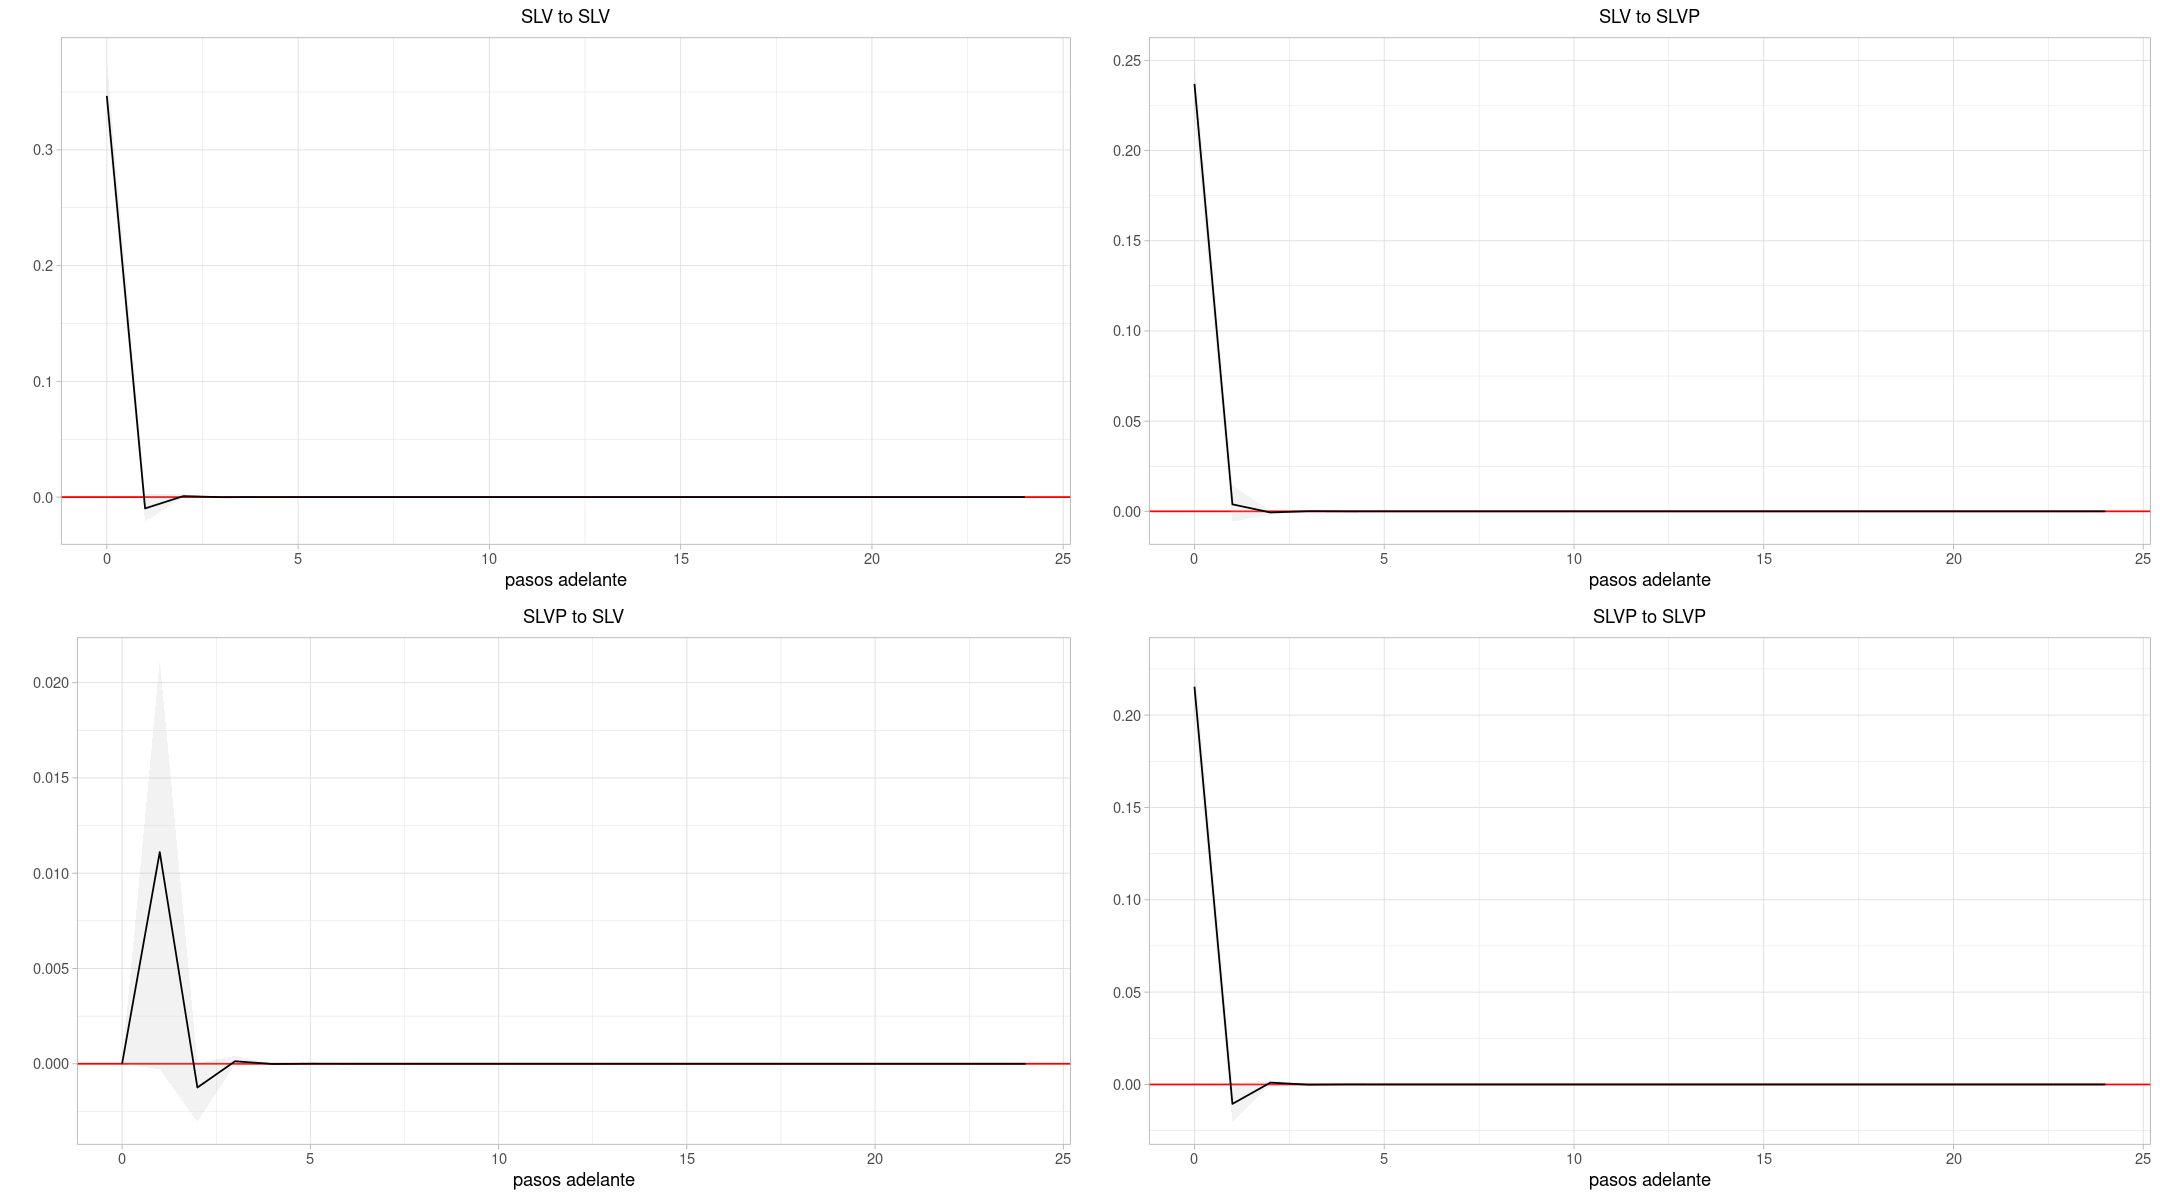

In [276]:
library(gridExtra)

x <- grid.arrange(Y1.Y1., Y1.Y2., Y2.Y1., Y2.Y2., ncol=2)
ggsave("../Imagenes/impulso_respuesta.png", x, width = 10, height = 10, units = "in", dpi = 300)
x


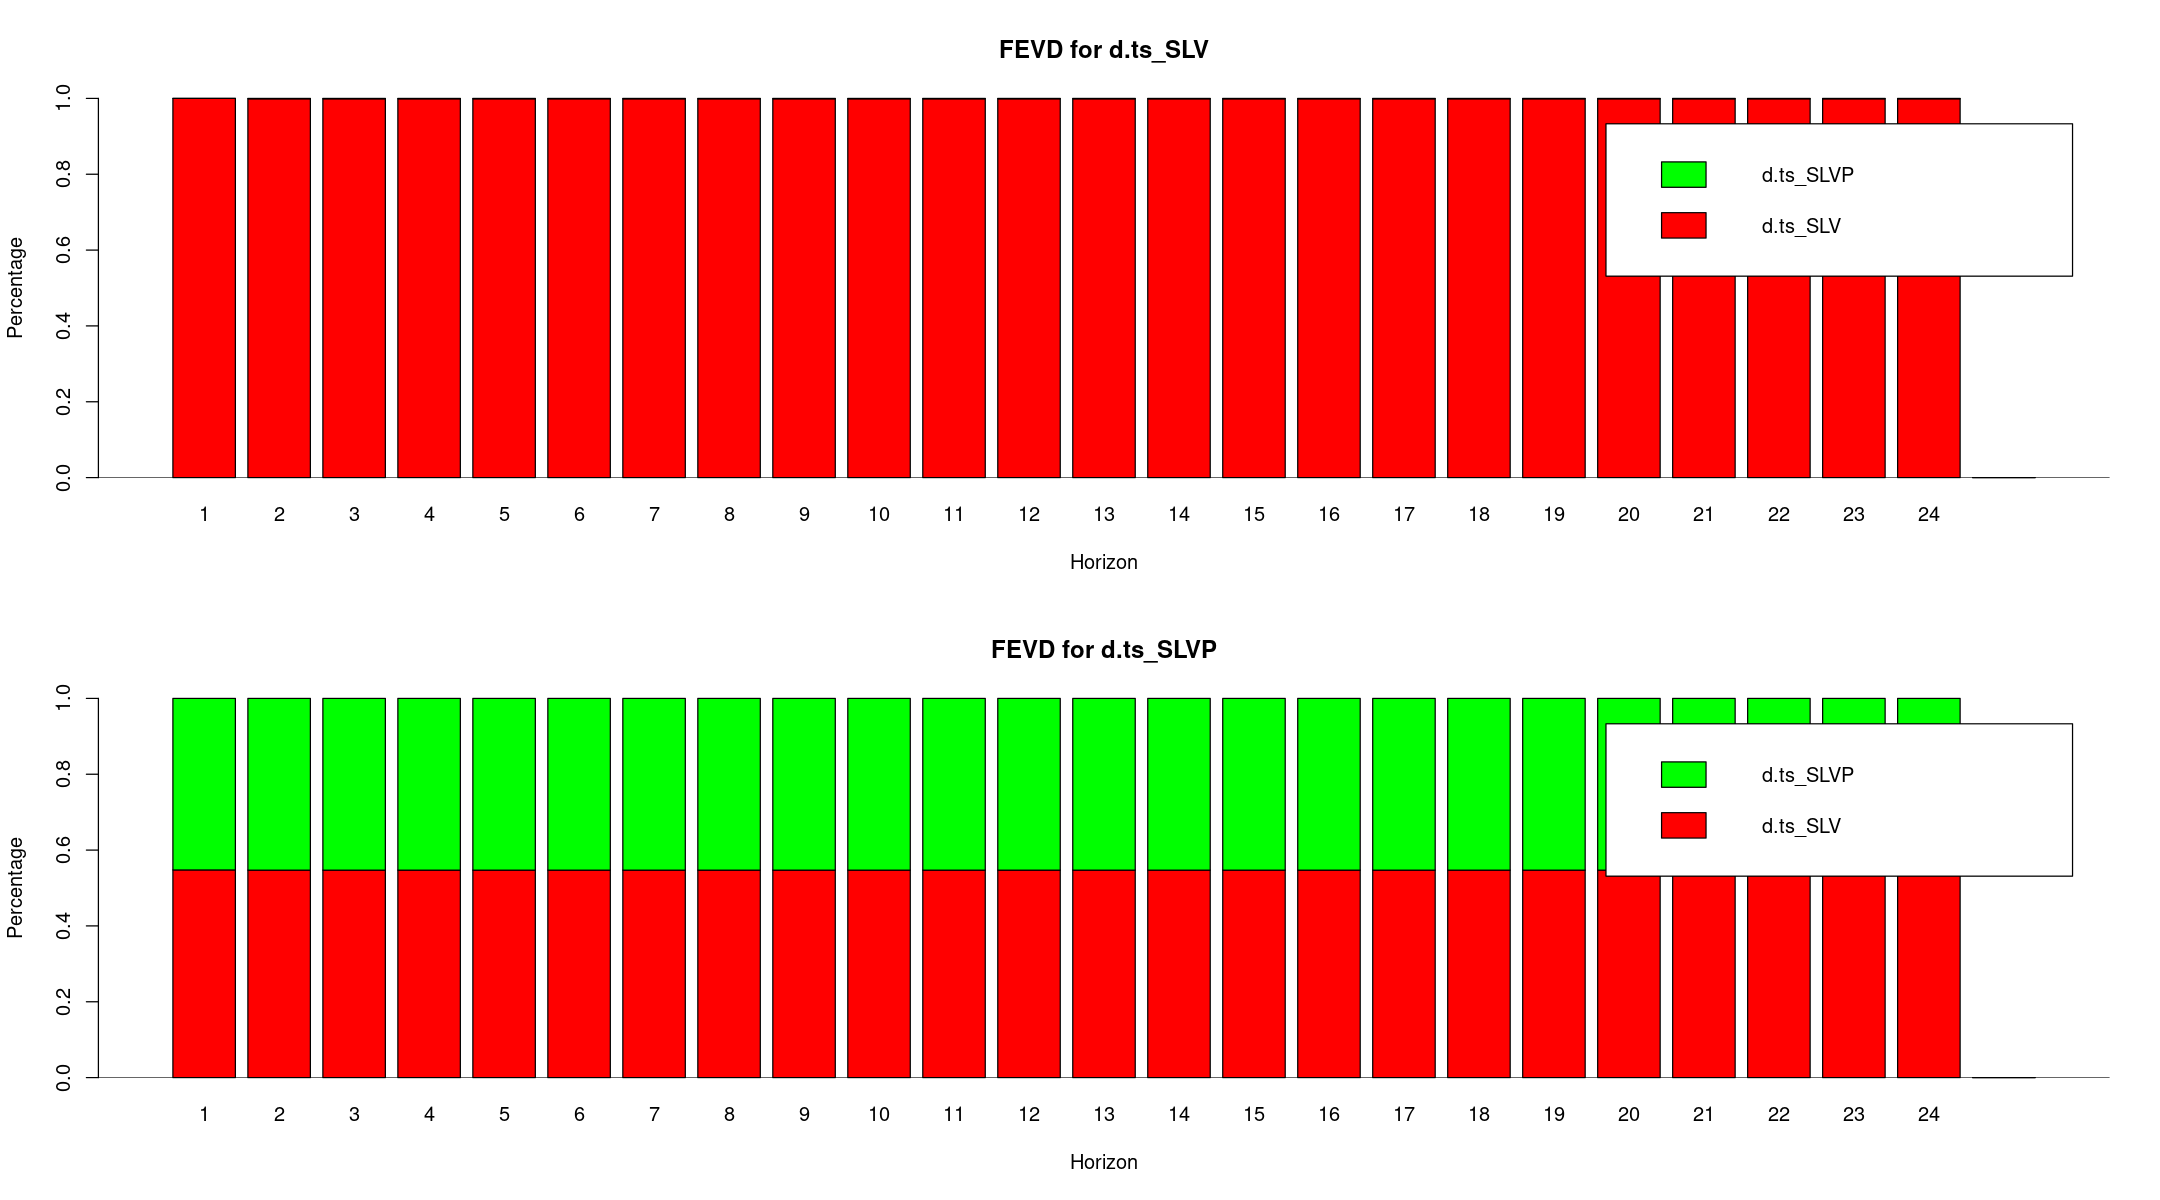

In [277]:
# fevd(VAR, n.ahead = 24)
plot(fevd(VAR, n.ahead = 24),col=c("red", "green", "yellow"))

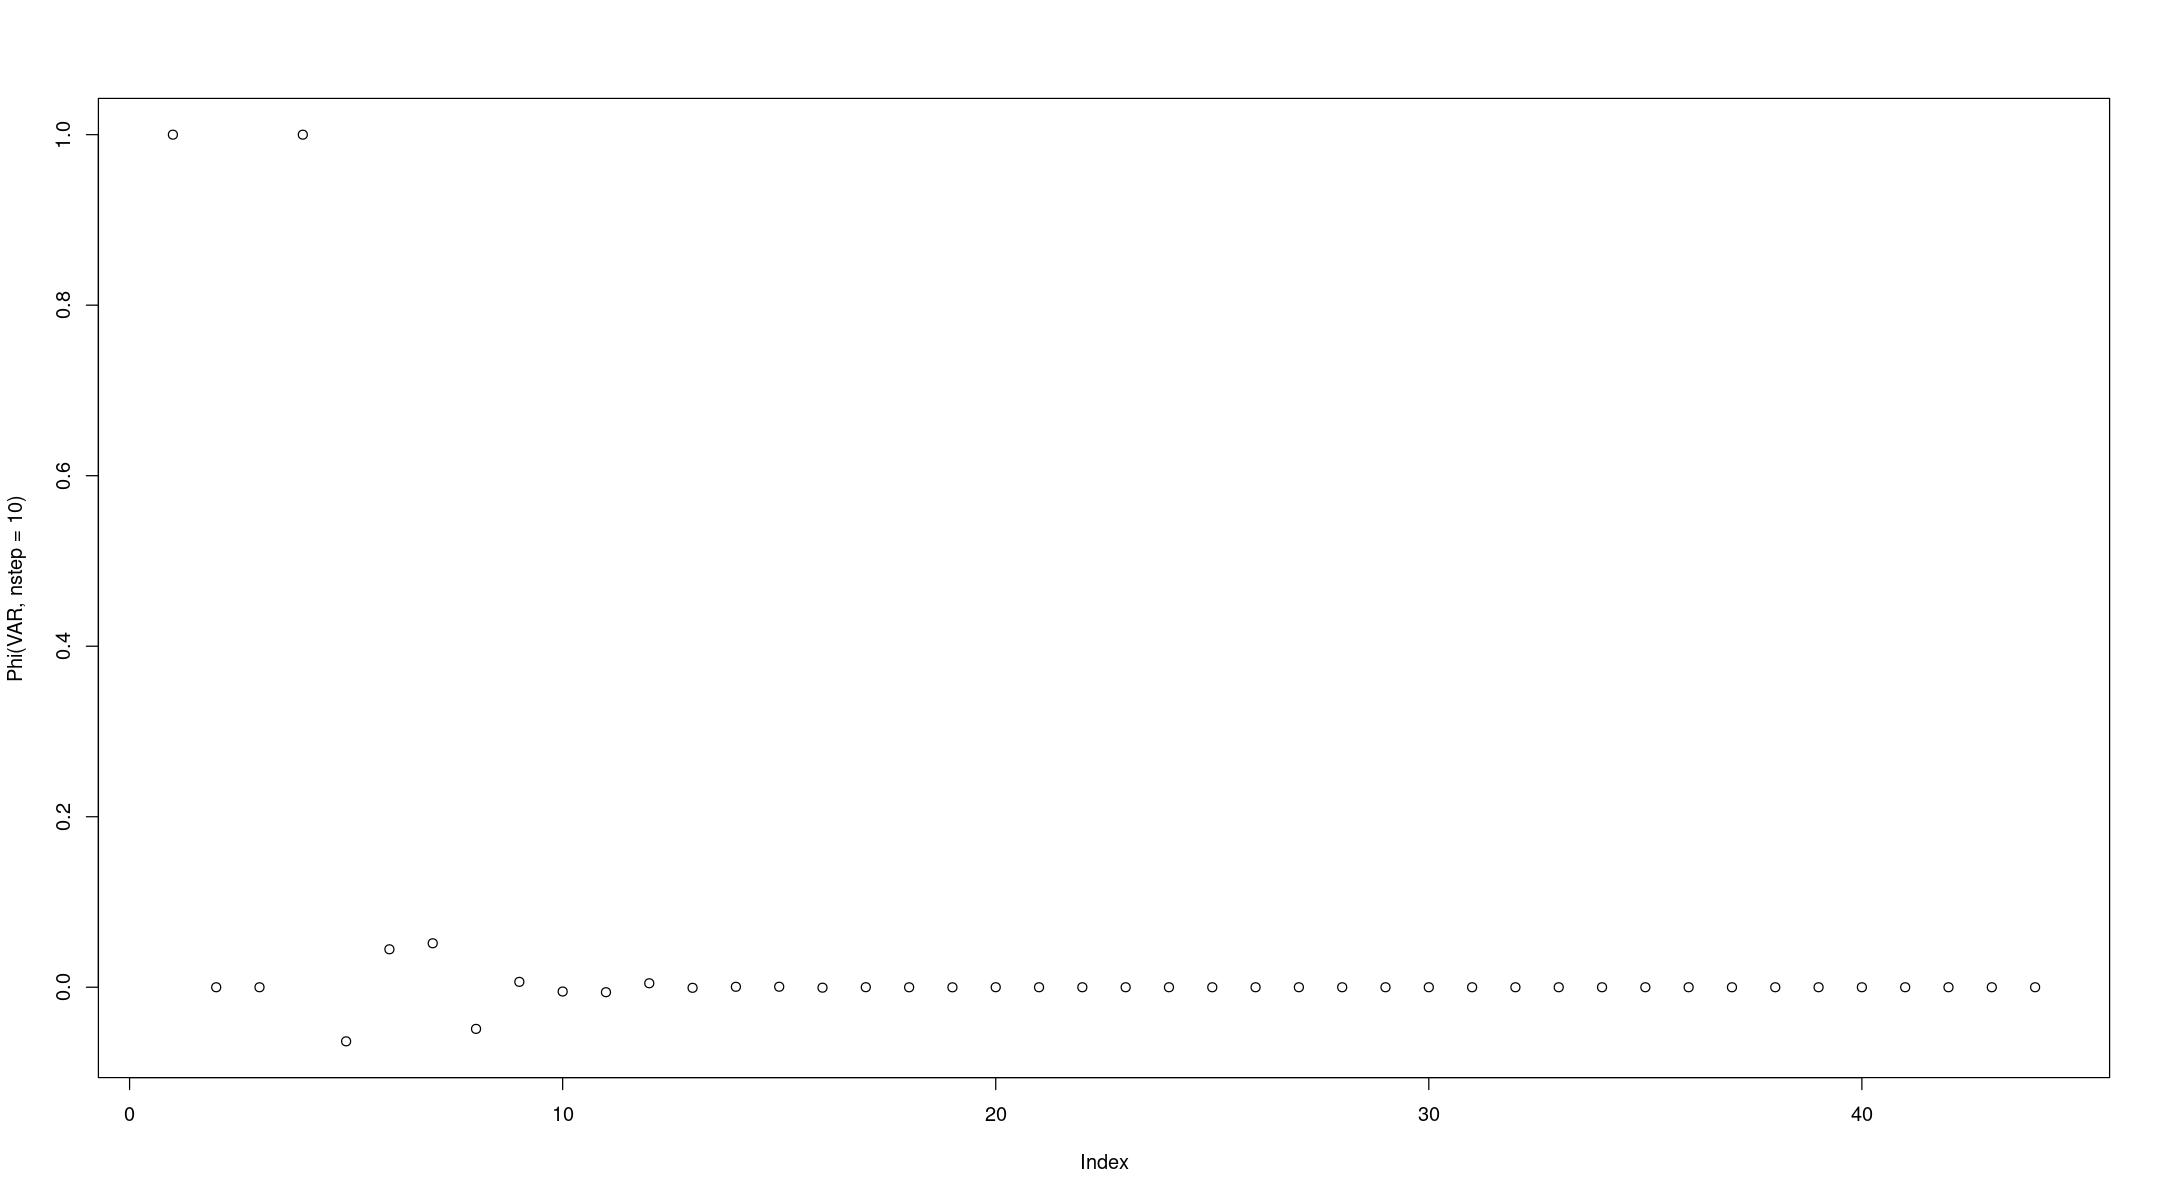

In [278]:
plot(Phi(VAR,nstep=10))

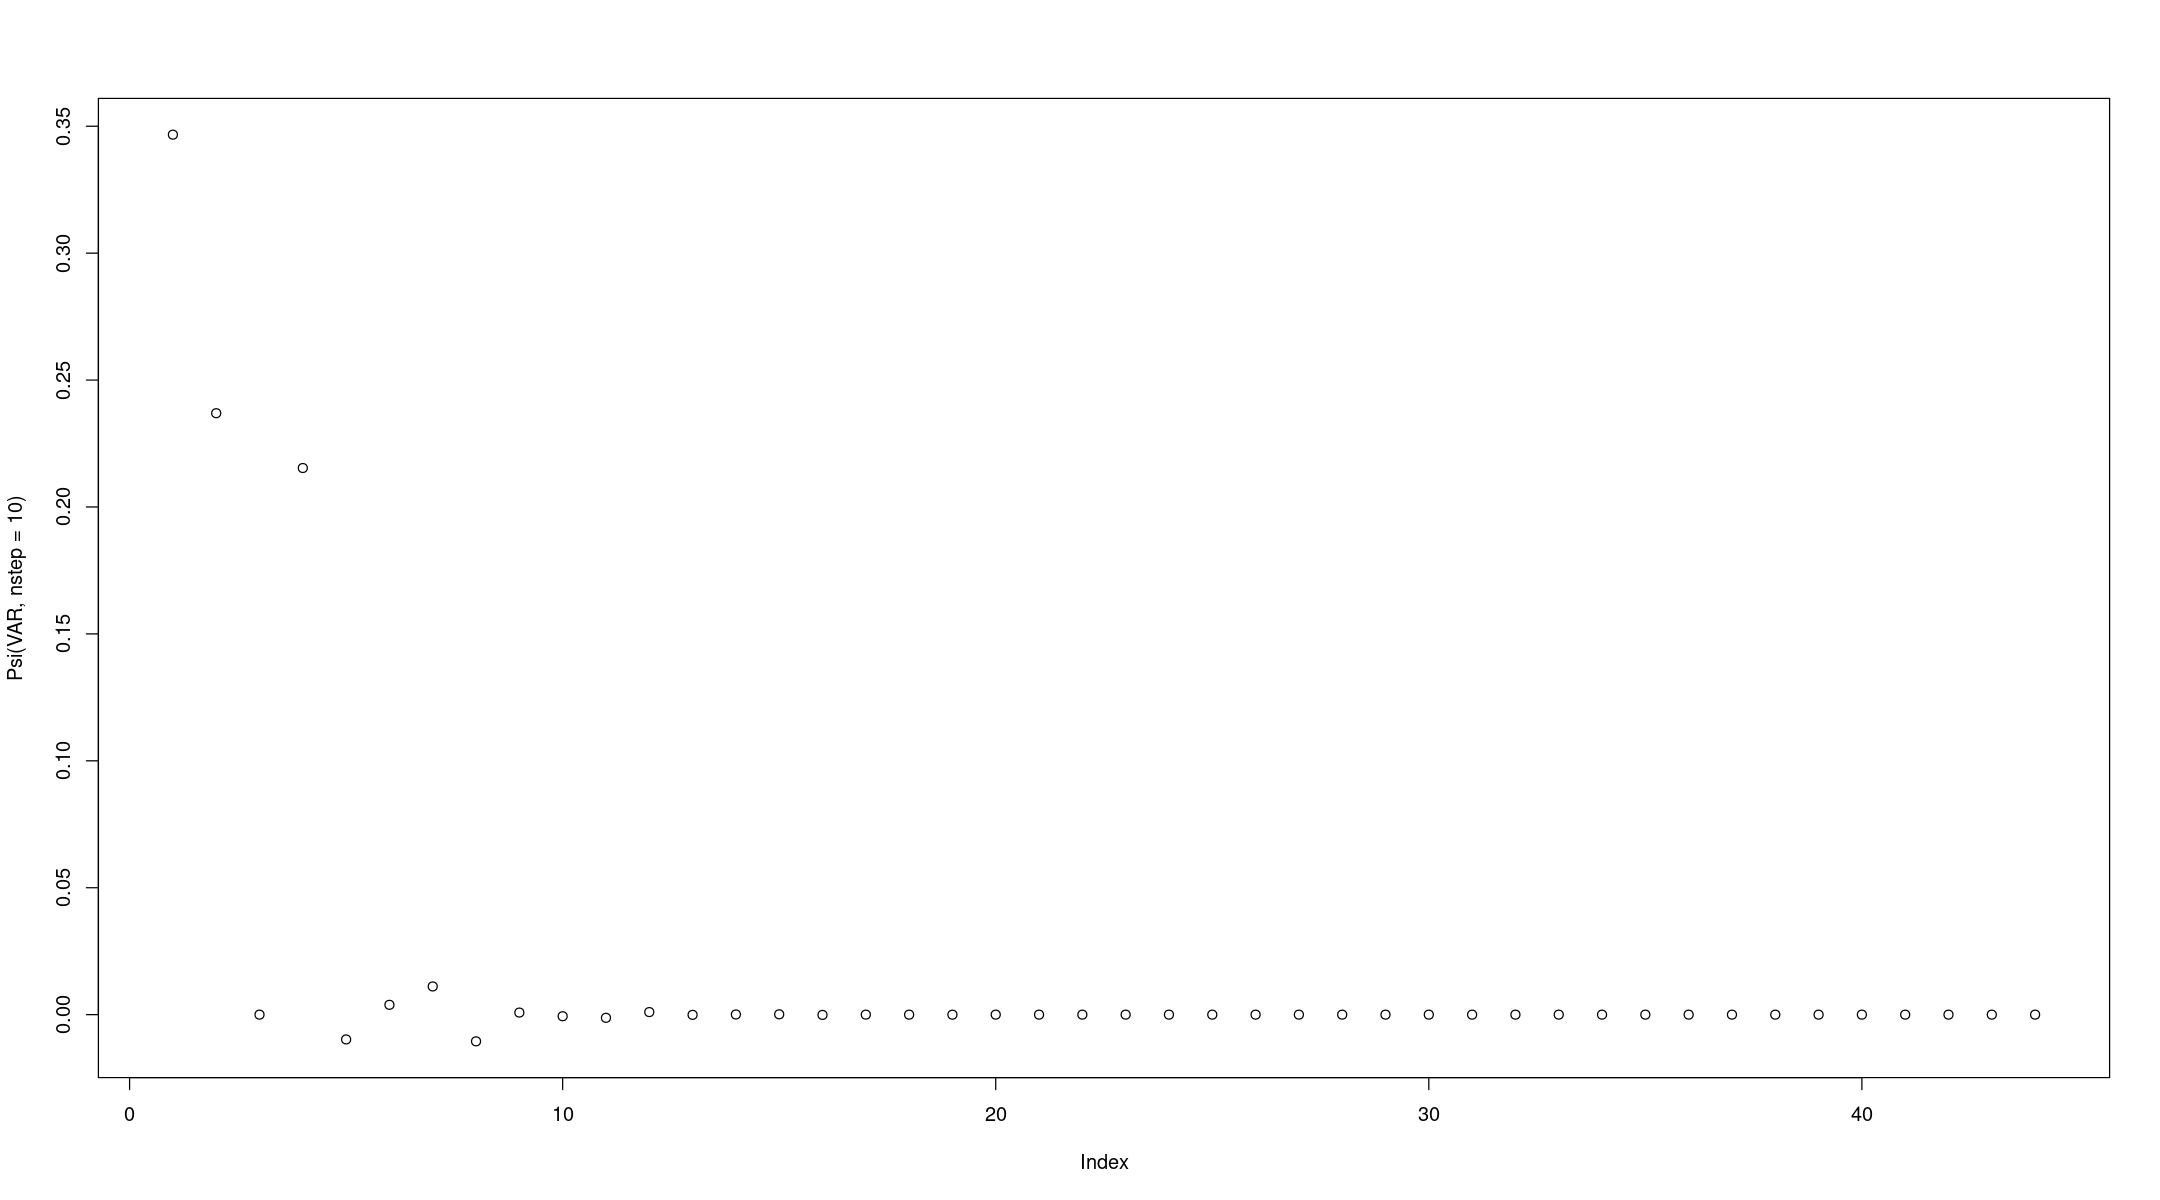

In [279]:
plot(Psi(VAR,nstep=10)) 

In [280]:
X = cbind(ts_SLV,ts_SLVP)

In [281]:
eigen1 = ca.jo(X, ecdet = "none", type = "eigen", K = 2, spec = "transitory", season = NULL)
summary(eigen1)

trace1= ca.jo(X, ecdet = "none", type = "trace", K = 2, spec = "transitory", season = NULL)
summary(trace1)


###################### 
# Johansen-Procedure # 
###################### 

Test type: maximal eigenvalue statistic (lambda max) , with linear trend 

Eigenvalues (lambda):
[1] 0.00492985417 0.00393991802

Values of teststatistic and critical values of test:

          test 10pct  5pct  1pct
r <= 1 | 11.16  6.50  8.18 11.65
r = 0  | 13.97 12.91 14.90 19.19

Eigenvectors, normalised to first column:
(These are the cointegration relations)

             ts_SLV.l1   ts_SLVP.l1
ts_SLV.l1   1.00000000  1.000000000
ts_SLVP.l1 -1.61767272 -0.701455973

Weights W:
(This is the loading matrix)

                ts_SLV.l1     ts_SLVP.l1
ts_SLV.d  -0.000756503646 -0.00890343033
ts_SLVP.d  0.005291089824 -0.00653187961



###################### 
# Johansen-Procedure # 
###################### 

Test type: trace statistic , with linear trend 

Eigenvalues (lambda):
[1] 0.00492985417 0.00393991802

Values of teststatistic and critical values of test:

          test 10pct  5pct  1pct
r <= 1 | 11.16  6.50  8.18 11.65
r = 0  | 25.13 15.66 17.95 23.52

Eigenvectors, normalised to first column:
(These are the cointegration relations)

             ts_SLV.l1   ts_SLVP.l1
ts_SLV.l1   1.00000000  1.000000000
ts_SLVP.l1 -1.61767272 -0.701455973

Weights W:
(This is the loading matrix)

                ts_SLV.l1     ts_SLVP.l1
ts_SLV.d  -0.000756503646 -0.00890343033
ts_SLVP.d  0.005291089824 -0.00653187961


In [282]:
VEC1 = cajorls(eigen1, r=1) 
VEC1

$rlm

Call:
lm(formula = substitute(form1), data = data.mat)

Coefficients:
             ts_SLV.d      ts_SLVP.d   
ect1         -0.000756504   0.005291090
constant     -0.004263223  -0.002787740
ts_SLV.dl1   -0.063161653   0.042866691
ts_SLVP.dl1   0.050821164  -0.045404948


$beta
                  ect1
ts_SLV.l1   1.00000000
ts_SLVP.l1 -1.61767272


In [283]:
library(tsDyn)

#Con esta función obtenemos el vector de cointegración normalizado
coefB(VEC1)

#Con esta función obtenemos los coeficientes de velocidad de ajuste
coefA(VEC1)

,ect1
ts_SLV.l1,1.00000000
ts_SLVP.l1,-1.61767272


,ect1
ts_SLV.d,-0.000756503646
ts_SLVP.d,0.005291089824


In [284]:
VAR.SLV = vec2var(eigen1, r = 1) # VAR.oil va a ser la reparametrización del modelo VEC anterior como VAR en niveles
VAR.SLV


Coefficient matrix of lagged endogenous variables:

A1:
           ts_SLV.l1  ts_SLVP.l1
ts_SLV  0.9360818434 0.052044939
ts_SLVP 0.0481577805 0.946035800


A2:
            ts_SLV.l2    ts_SLVP.l2
ts_SLV   0.0631616530 -0.0508211637
ts_SLVP -0.0428666907  0.0454049482


Coefficient matrix of deterministic regressor(s).

              constant
ts_SLV  -0.00426322340
ts_SLVP -0.00278773986

In [285]:
P.14=serial.test(VAR.SLV, lags.pt = length(ts_SLV)/4, type = "PT.asymptotic");P.14 #No rechazo, se cumple el supuesto
P.16=serial.test(VAR.SLV, lags.pt = length(ts_SLV)/6, type = "PT.asymptotic");P.16 #No rechazo, se cumple el supuesto


	Portmanteau Test (asymptotic)

data:  Residuals of VAR object VAR.SLV
Chi-squared = 2364.224, df = 2822, p-value = 1

$serial

	Portmanteau Test (asymptotic)

data:  Residuals of VAR object VAR.SLV
Chi-squared = 2364.224, df = 2822, p-value = 1




	Portmanteau Test (asymptotic)

data:  Residuals of VAR object VAR.SLV
Chi-squared = 1901.179, df = 1878, p-value = 0.349183

$serial

	Portmanteau Test (asymptotic)

data:  Residuals of VAR object VAR.SLV
Chi-squared = 1901.179, df = 1878, p-value = 0.349183



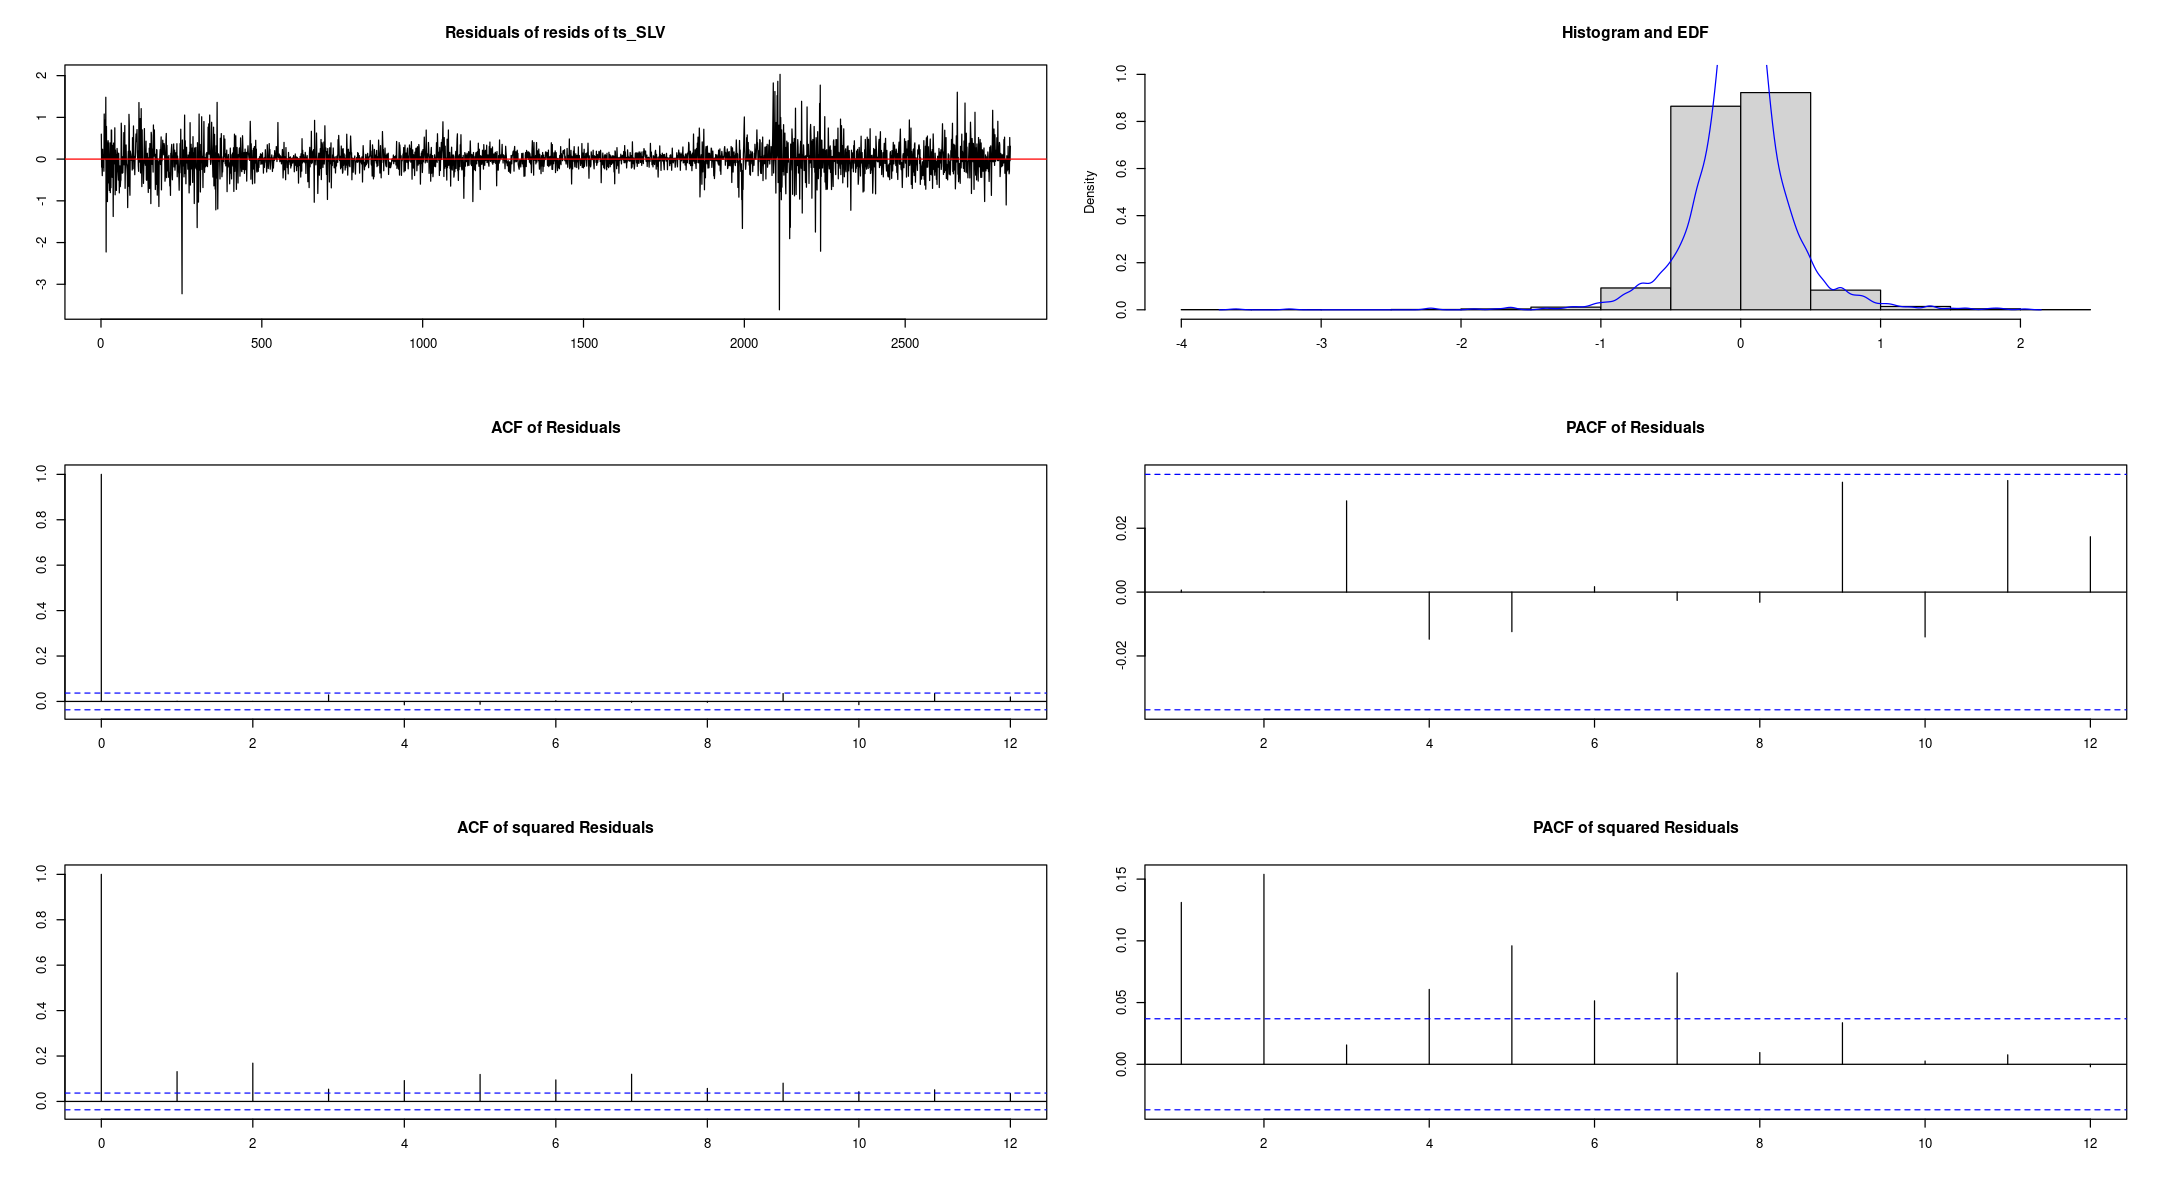

Warning message in plot.varcheck(P.14, names = "SLV"):
“
Invalid residual name(s) supplied, using residuals of first variable.
”


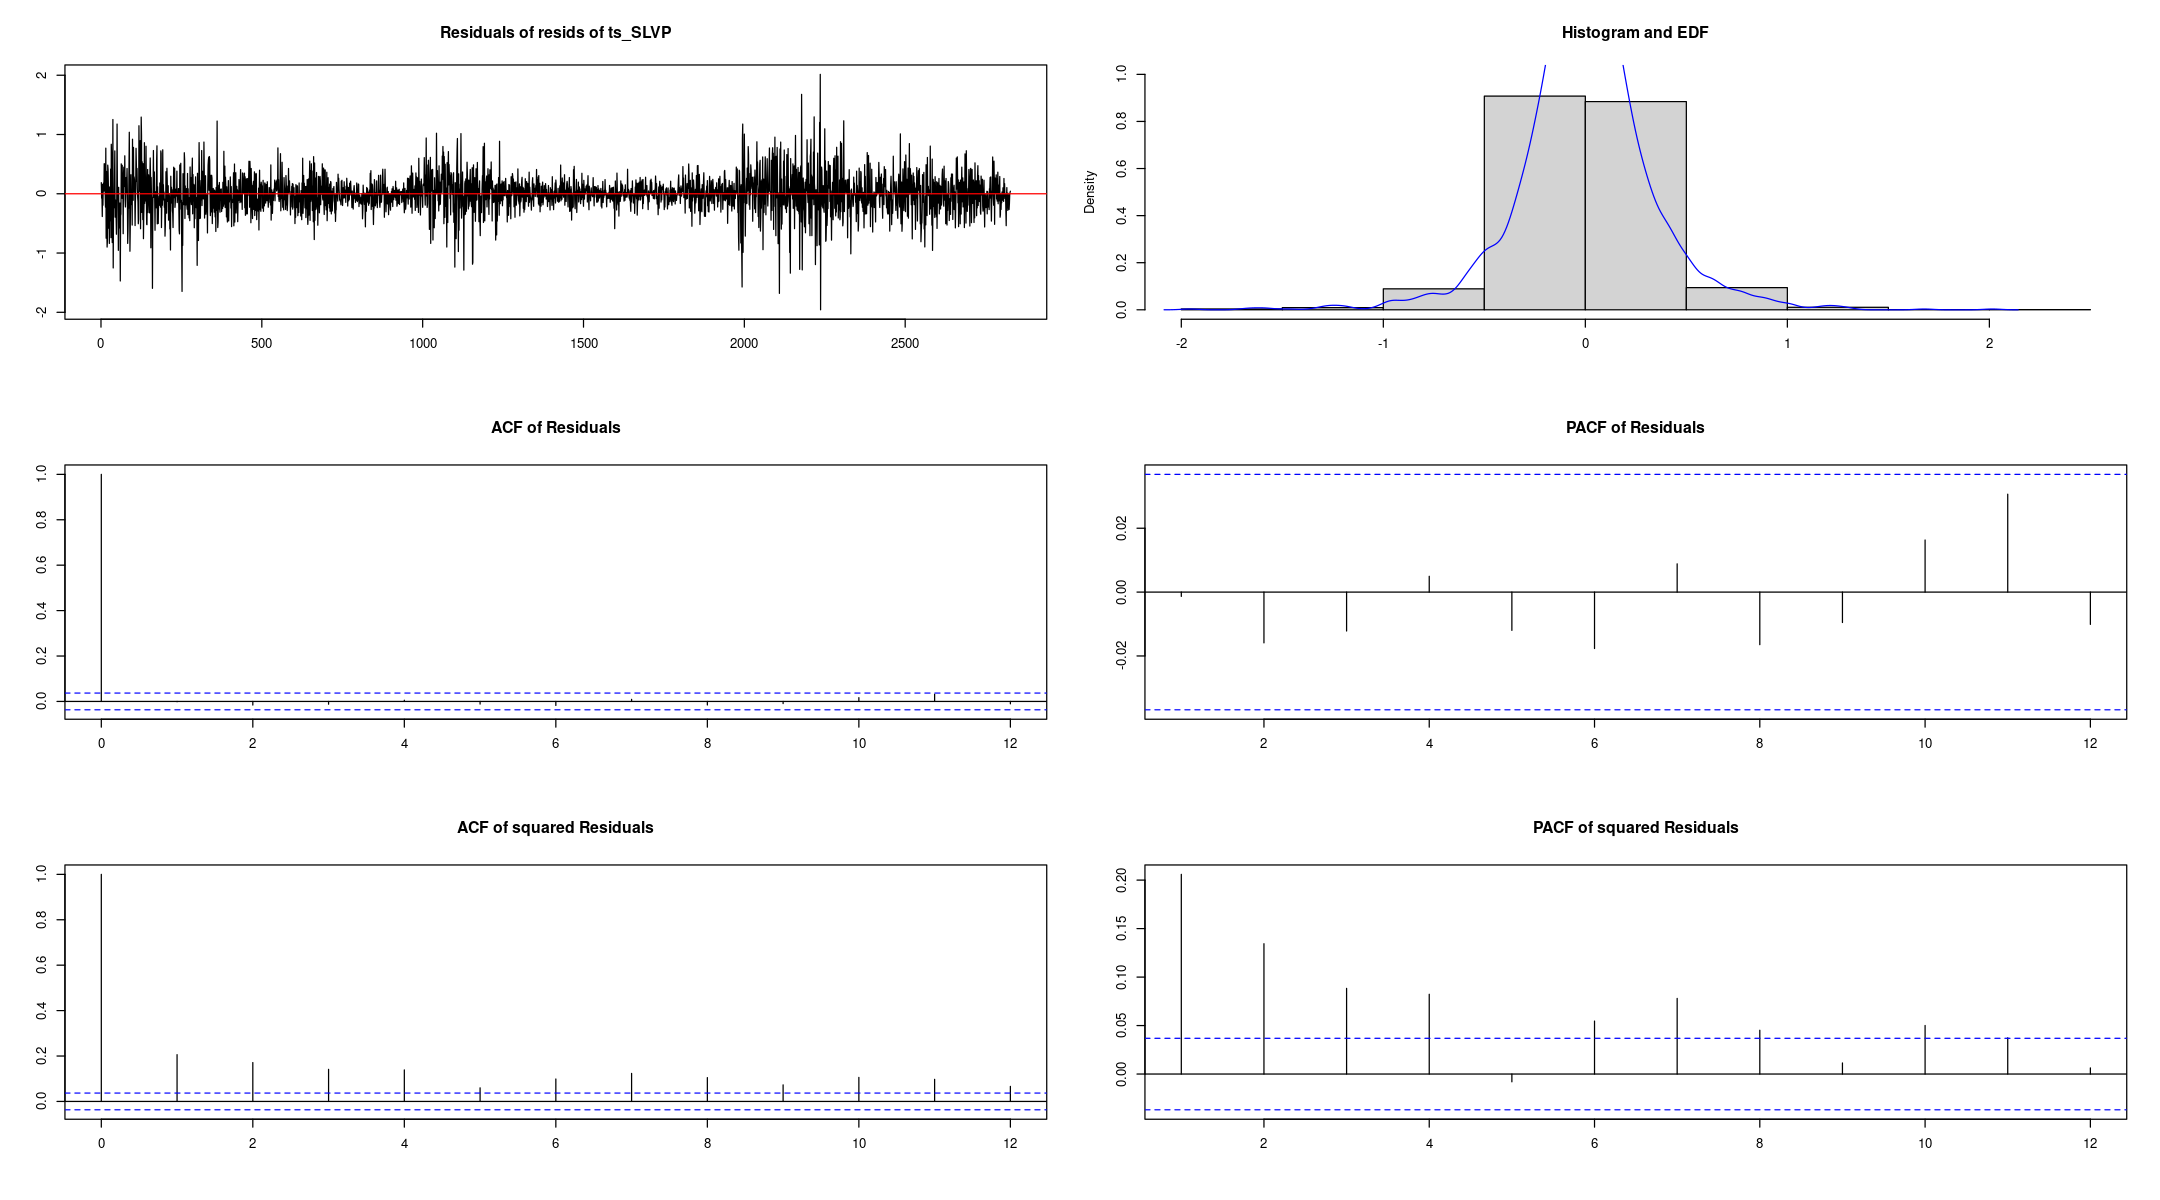

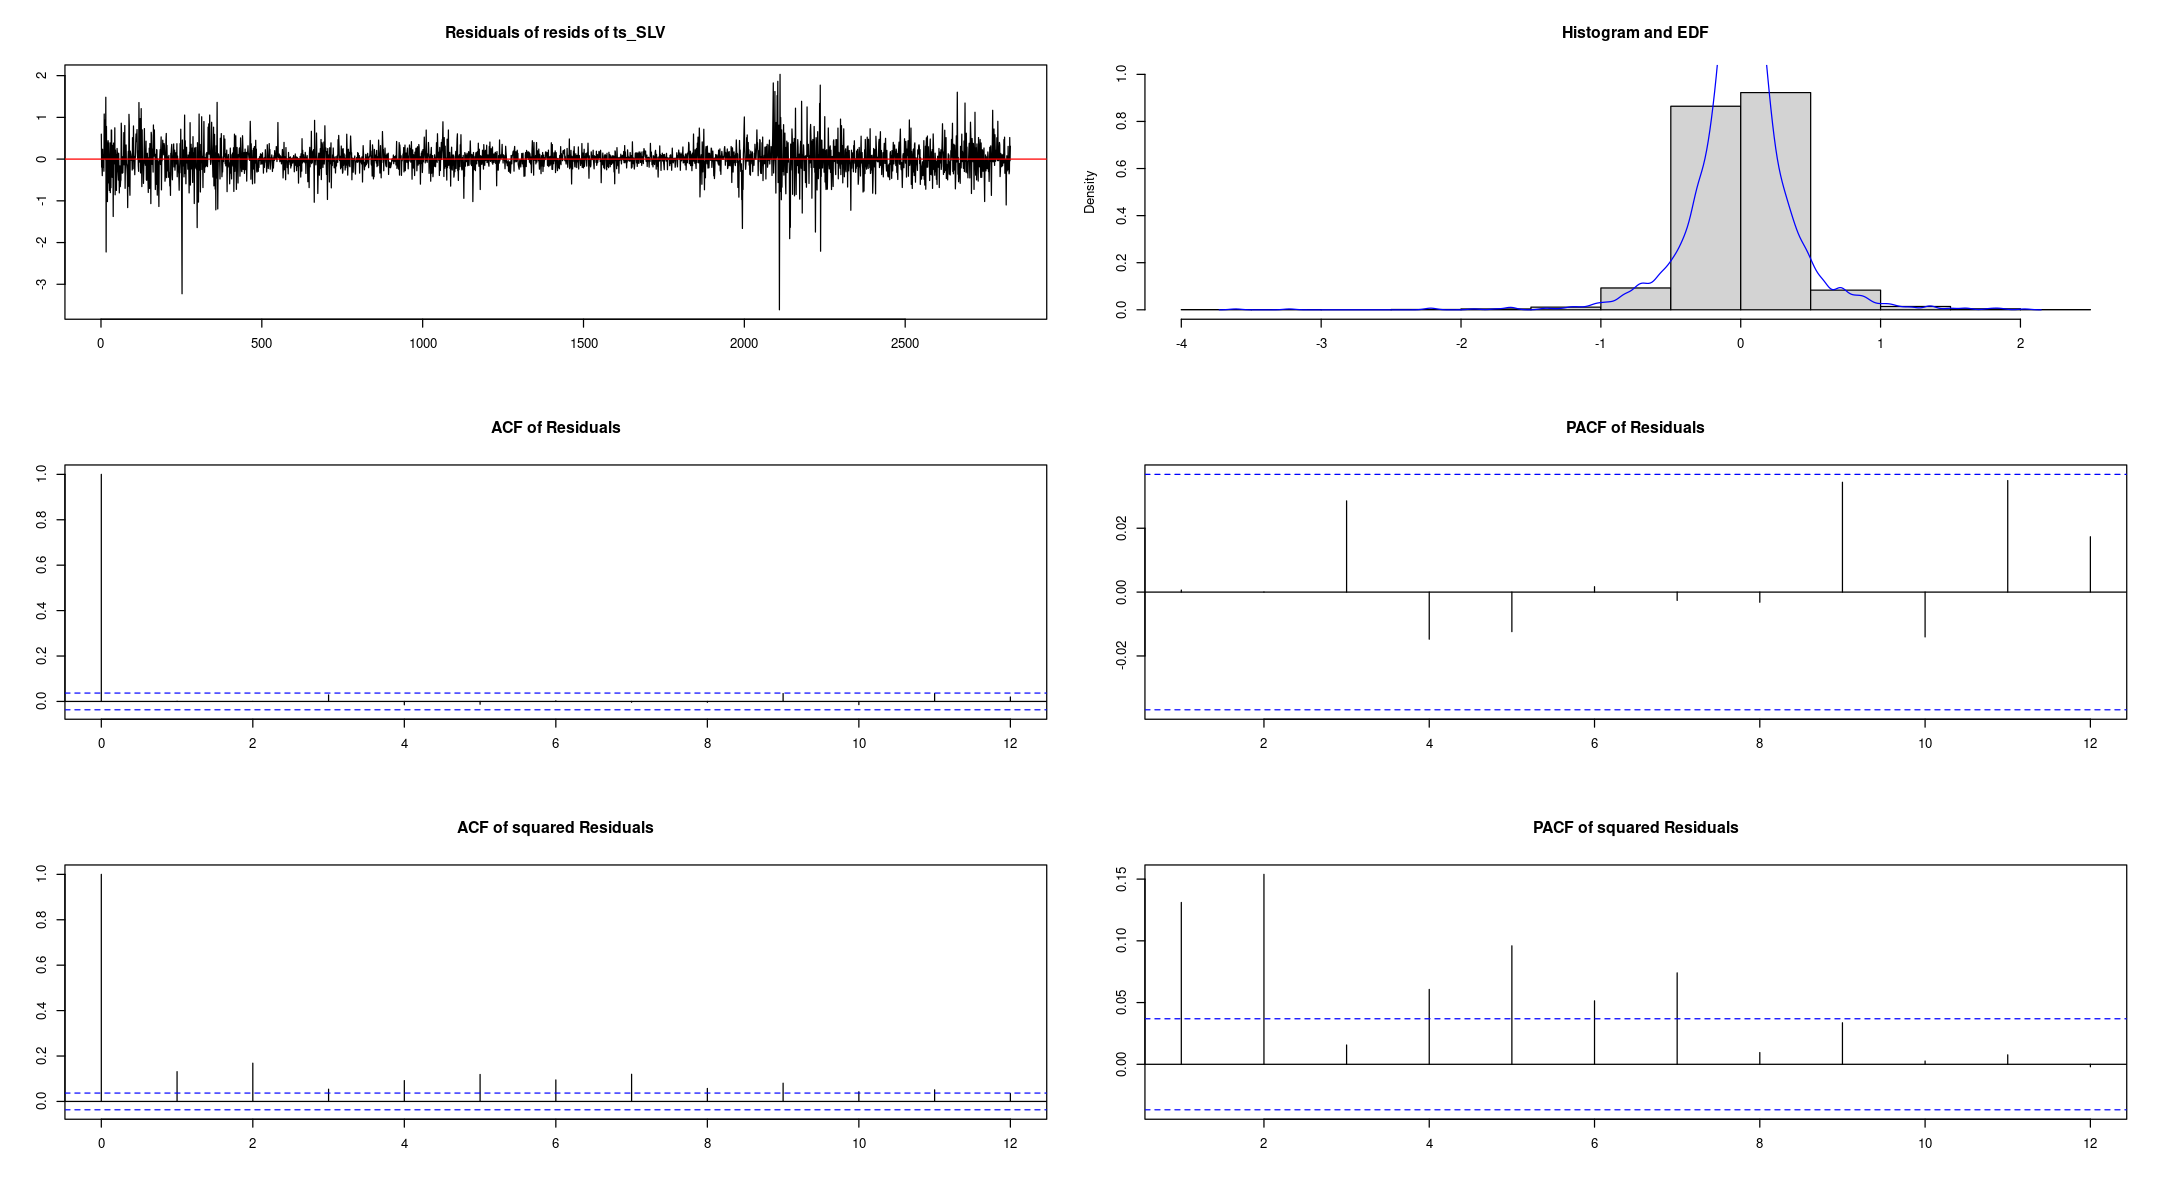

In [286]:
plot(P.14) #Bien comportados, salvo por los residuales al cuadrado
plot(P.14, names = "SLV") #Bien comportados, salvo por los residuales al cuadrado

In [287]:
vars::arch.test(VAR.SLV, lags.multi = 24, multivariate.only = TRUE) #Rechazo, no se cumple el supuesto.
vars::arch.test(VAR.SLV, lags.multi = 12, multivariate.only = TRUE) #Rechazo, no se cumple el supuesto


	ARCH (multivariate)

data:  Residuals of VAR object VAR.SLV
Chi-squared = 990.64, df = 216, p-value < 2.22e-16

$arch.mul

	ARCH (multivariate)

data:  Residuals of VAR object VAR.SLV
Chi-squared = 990.64, df = 216, p-value < 2.22e-16




	ARCH (multivariate)

data:  Residuals of VAR object VAR.SLV
Chi-squared = 785.0432, df = 108, p-value < 2.22e-16

$arch.mul

	ARCH (multivariate)

data:  Residuals of VAR object VAR.SLV
Chi-squared = 785.0432, df = 108, p-value < 2.22e-16



In [288]:
normality.test(VAR.SLV) #Rechazo, no se cumple el supuesto.

$JB

	JB-Test (multivariate)

data:  Residuals of VAR object VAR.SLV
Chi-squared = 22628.62, df = 4, p-value < 2.22e-16


$Skewness

	Skewness only (multivariate)

data:  Residuals of VAR object VAR.SLV
Chi-squared = 238.2268, df = 2, p-value < 2.22e-16


$Kurtosis

	Kurtosis only (multivariate)

data:  Residuals of VAR object VAR.SLV
Chi-squared = 22390.39, df = 2, p-value < 2.22e-16


$jb.mul
$jb.mul$JB

	JB-Test (multivariate)

data:  Residuals of VAR object VAR.SLV
Chi-squared = 22628.62, df = 4, p-value < 2.22e-16


$jb.mul$Skewness

	Skewness only (multivariate)

data:  Residuals of VAR object VAR.SLV
Chi-squared = 238.2268, df = 2, p-value < 2.22e-16


$jb.mul$Kurtosis

	Kurtosis only (multivariate)

data:  Residuals of VAR object VAR.SLV
Chi-squared = 22390.39, df = 2, p-value < 2.22e-16


